In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import scipy.stats
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from math import sqrt
import geopandas as gpd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Part1

### Load London Underground network data

In [3]:
# Open the London underground network
network = nx.read_graphml('data/london.graph.xml')

In [4]:
# List all operations of the network
print(len(dir(network)))
for i in np.random.randint(0, len(dir(network)), 10):
    print(dir(network)[i])

76
__setattr__
add_nodes_from
is_multigraph
__delattr__
graph_attr_dict_factory
add_nodes_from
_node
__eq__
node_attr_dict_factory
__lt__


In [5]:
type(network)

networkx.classes.graph.Graph

In [6]:
print(network)

Graph with 401 nodes and 467 edges


In [7]:
# To check edges attributes:
list(network.edges(data = True))[0:10]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816, 'line_name': 'Jubilee', 'flows': 6744}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037, 'line_name': 'Metropolitan', 'flows': 36601}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068, 'line_name': 'Jubilee', 'flows': 9419}),
 ('Queensbury',
  'Canons Park',
  {'length': 1693.307343195774, 'line_name': 'Jubilee', 'flows': 6385}),
 ('Canons Park',
  'Stanmore',
  {'length': 1419.6694762456716, 'line_name': 'Jubilee', 'flows': 3624}),
 ('Stratford',
  'West Ham',
  {'length': 1673.509515131191, 'line_name': 'Jubilee', 'flows': 91801}),
 ('Stratford',
  'Mile End',
  {'length': 2805.0013918567865, 'line_name': 'Central', 'flows': 12010}),
 ('Stratford',
  'Leyton',
  {'le

In [8]:
# To check node attributes:
list(network.nodes(data = True))[0:10]

[('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'}),
 ('Kingsbury', {'coords': '(519359.9688603217, 188721.22027255083)'}),
 ('Queensbury', {'coords': '(518811.3613368616, 189760.50737704366)'}),
 ('Canons Park', {'coords': '(518183.29968291725, 191257.26260848)'}),
 ('Stanmore', {'coords': '(517580.4596464033, 192537.99948098673)'}),
 ('Stratford', {'coords': '(538524.7855297636, 184373.34100822973)'}),
 ('West Ham', {'coords': '(539160.2577659411, 182933.290067989)'}),
 ('Canning Town', {'coords': '(539439.020753582, 181338.40907066417)'}),
 ('North Greenwich', {'coords': '(539189.2108512281, 179809.60035511653)'}),
 ('Canary Wharf', {'coords': '(537586.6947649193, 180311.85419390627)'})]

In [9]:
# Then, check if the network is connected
is_connected = nx.is_connected(network)

# Print the result
print("Is the network connected?", "Yes" if is_connected else "No")

Is the network connected? Yes


In [10]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in network.nodes():
    network.nodes[node]['coords'] = eval(network.nodes[node]['coords'])

In [11]:
# To check node attributes:
list(network.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

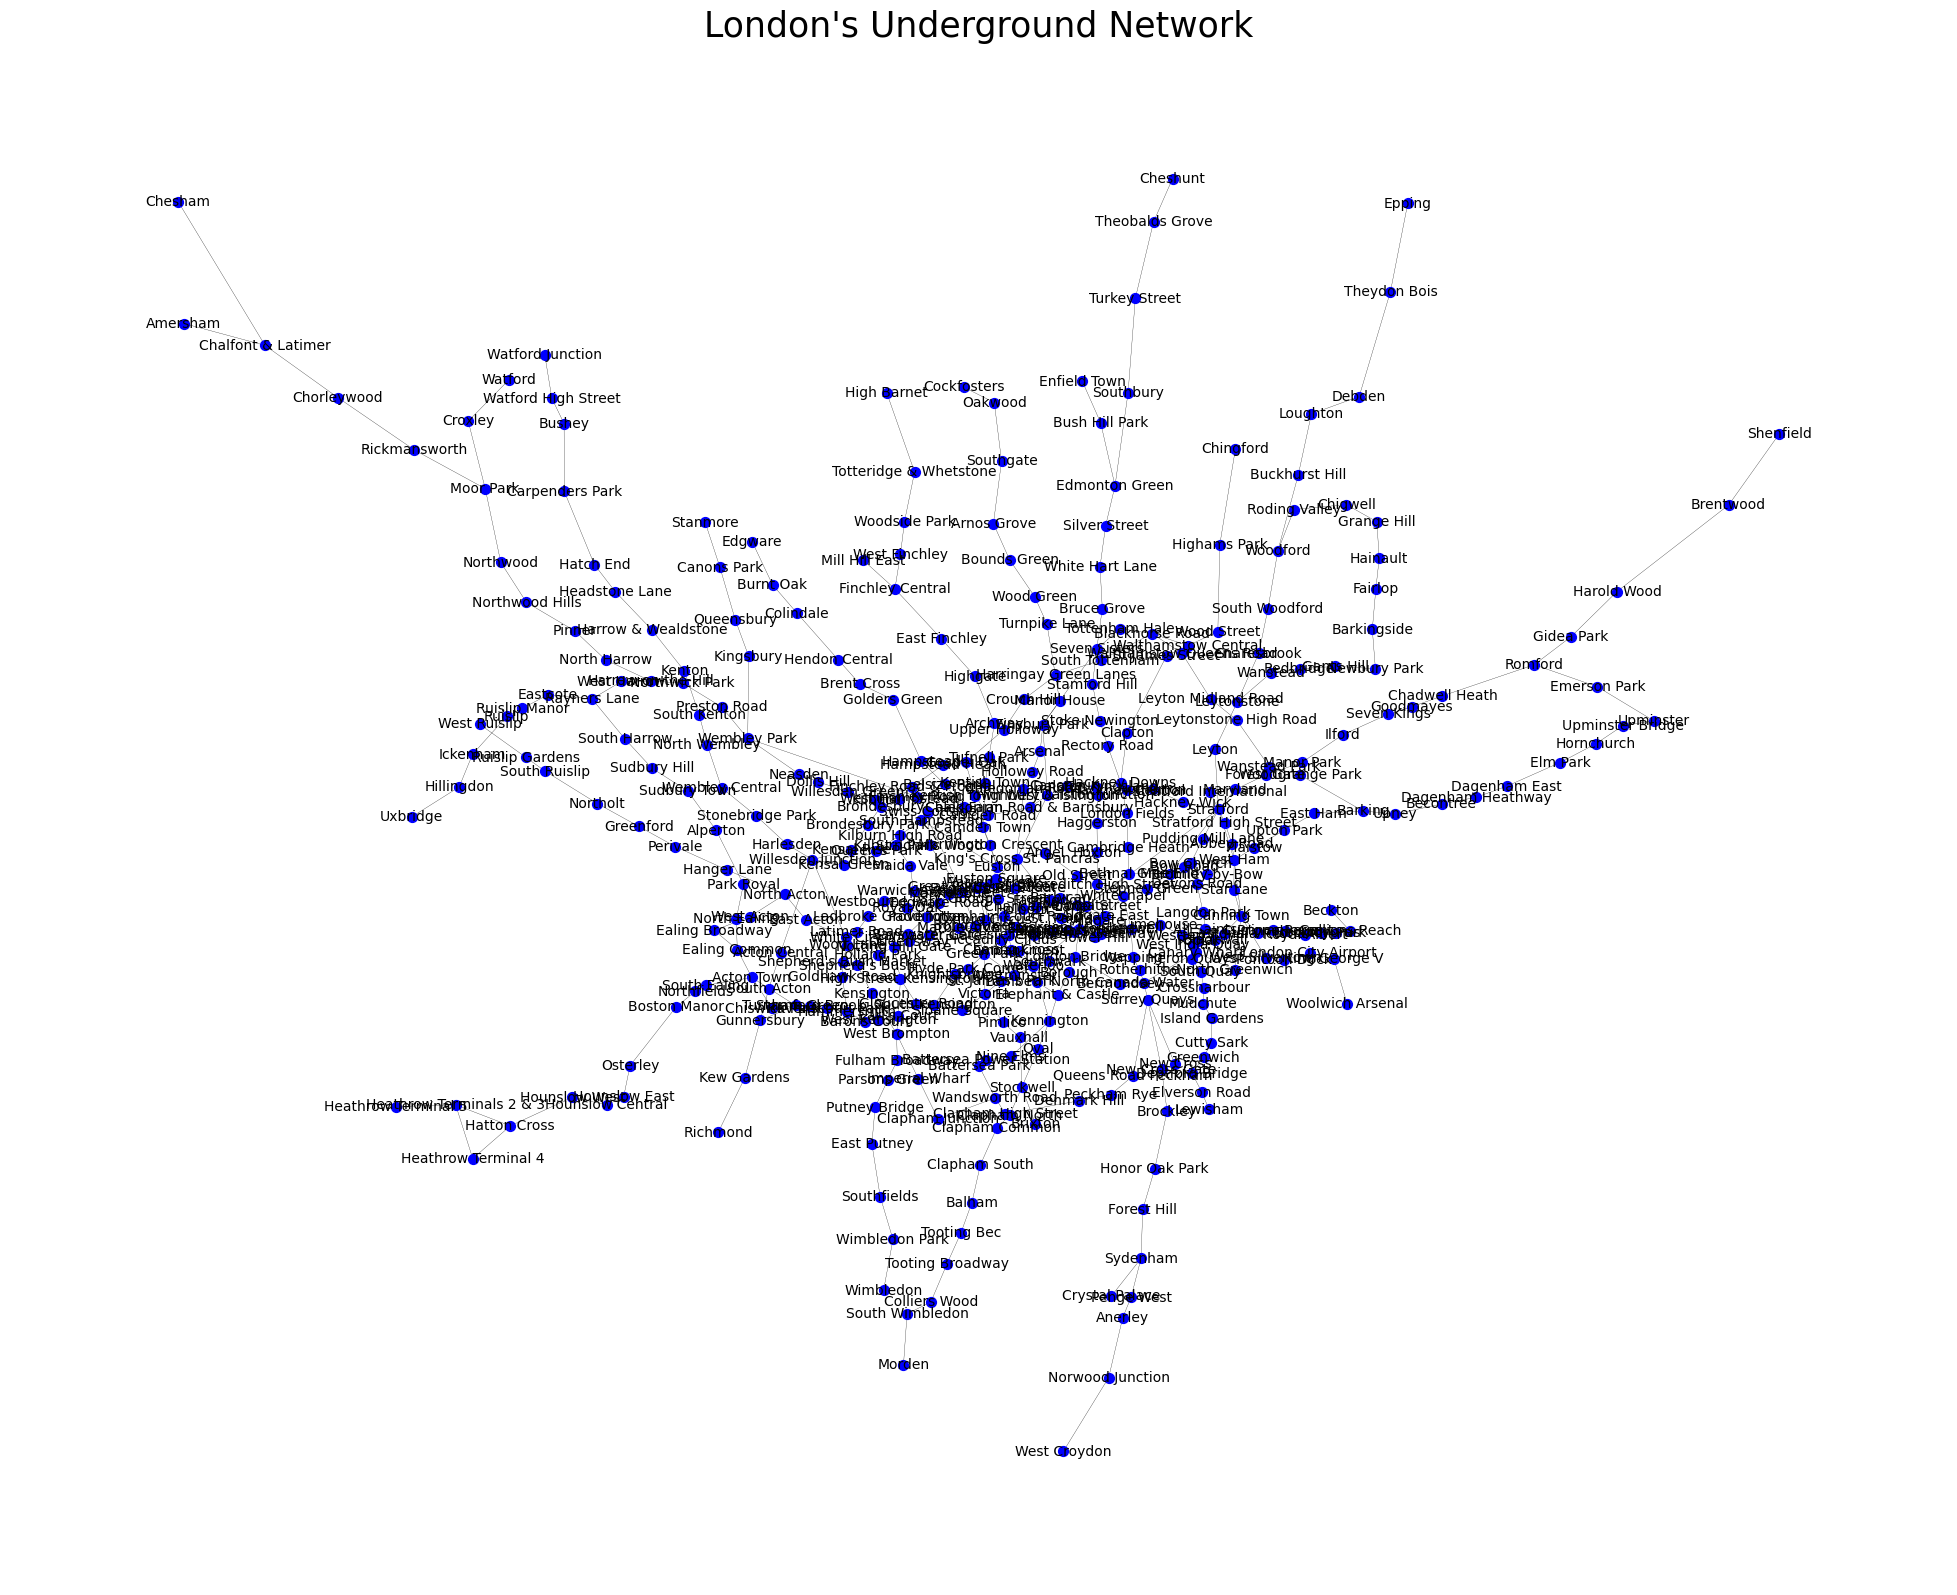

In [12]:
# Plot the network! 

# Plot the network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(network, 'coords')
node_labels = {node: node for node in pos}

nx.draw_networkx_nodes(network,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(network,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(network,pos, labels=node_labels, font_size=10, font_color='black')

plt.title("London's Underground Network",fontsize=25)
plt.axis("off")
plt.show()

## 1. Topological network

### 1.1 Centrality measures

**(1)  Degree centrality**

In [13]:
#Let us compute the degree centrality
deg_network=nx.degree(network)

# Print degree as list: 
list(deg_network)[0:10]

[('Wembley Park', 4),
 ('Kingsbury', 2),
 ('Queensbury', 2),
 ('Canons Park', 2),
 ('Stanmore', 1),
 ('Stratford', 9),
 ('West Ham', 6),
 ('Canning Town', 6),
 ('North Greenwich', 2),
 ('Canary Wharf', 4)]

In [14]:
# Print degree as dictionary:
dict(deg_network)

{'Wembley Park': 4,
 'Kingsbury': 2,
 'Queensbury': 2,
 'Canons Park': 2,
 'Stanmore': 1,
 'Stratford': 9,
 'West Ham': 6,
 'Canning Town': 6,
 'North Greenwich': 2,
 'Canary Wharf': 4,
 'Canada Water': 4,
 'Bermondsey': 2,
 'London Bridge': 4,
 'Southwark': 2,
 'Waterloo': 6,
 'Westminster': 4,
 'Green Park': 6,
 'Bond Street': 4,
 'Baker Street': 7,
 "St. John's Wood": 2,
 'Swiss Cottage': 2,
 'Finchley Road': 4,
 'Neasden': 2,
 'Dollis Hill': 2,
 'Willesden Green': 2,
 'Kilburn': 2,
 'West Hampstead': 4,
 'West Acton': 2,
 'Ealing Broadway': 2,
 'North Acton': 3,
 'West Ruislip': 1,
 'Ruislip Gardens': 2,
 'South Ruislip': 2,
 'Northolt': 2,
 'Greenford': 2,
 'Perivale': 2,
 'Hanger Lane': 2,
 'East Acton': 2,
 'White City': 2,
 "Shepherd's Bush": 4,
 'Holland Park': 2,
 'Notting Hill Gate': 4,
 'Queensway': 2,
 'Lancaster Gate': 2,
 'Marble Arch': 2,
 'Oxford Circus': 6,
 'Tottenham Court Road': 4,
 'Holborn': 4,
 'Chancery Lane': 2,
 "St. Paul's": 2,
 'Bank and Monument': 8,
 'Liv

In [15]:
# Let us add the degree data as attribute to the nodes in the graph
# Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
nx.set_node_attributes(network,dict(deg_network),'degree')

# To check nodes attributes
list(network.nodes(data=True))[0:10]

[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672), 'degree': 4}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083), 'degree': 2}),
 ('Queensbury',
  {'coords': (518811.3613368616, 189760.50737704366), 'degree': 2}),
 ('Canons Park',
  {'coords': (518183.29968291725, 191257.26260848), 'degree': 2}),
 ('Stanmore',
  {'coords': (517580.4596464033, 192537.99948098673), 'degree': 1}),
 ('Stratford',
  {'coords': (538524.7855297636, 184373.34100822973), 'degree': 9}),
 ('West Ham', {'coords': (539160.2577659411, 182933.290067989), 'degree': 6}),
 ('Canning Town',
  {'coords': (539439.020753582, 181338.40907066417), 'degree': 6}),
 ('North Greenwich',
  {'coords': (539189.2108512281, 179809.60035511653), 'degree': 2}),
 ('Canary Wharf',
  {'coords': (537586.6947649193, 180311.85419390627), 'degree': 4})]

In [16]:
# Return degree attributes that we will use for the colour of nodes 
deg_color=[(node['degree']) for i, node in network.nodes(data=True)]

print(deg_color)

[4, 2, 2, 2, 1, 9, 6, 6, 2, 4, 4, 2, 4, 2, 6, 4, 6, 4, 7, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 6, 4, 4, 2, 2, 8, 6, 3, 4, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 2, 2, 2, 2, 4, 5, 2, 2, 4, 2, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 4, 2, 2, 5, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 6, 3, 2, 3, 4, 2, 2, 5, 2, 4, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 4, 3, 4, 2, 4, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 2, 

In [17]:
# For setting node size based on degree values

deg_size=[(float(node['degree'])/max(deg_color)*1000) for i, node in network.nodes(data=True)]

print(deg_size)

[444.4444444444444, 222.2222222222222, 222.2222222222222, 222.2222222222222, 111.1111111111111, 1000.0, 666.6666666666666, 666.6666666666666, 222.2222222222222, 444.4444444444444, 444.4444444444444, 222.2222222222222, 444.4444444444444, 222.2222222222222, 666.6666666666666, 444.4444444444444, 666.6666666666666, 444.4444444444444, 777.7777777777778, 222.2222222222222, 222.2222222222222, 444.4444444444444, 222.2222222222222, 222.2222222222222, 222.2222222222222, 222.2222222222222, 444.4444444444444, 222.2222222222222, 222.2222222222222, 333.3333333333333, 111.1111111111111, 222.2222222222222, 222.2222222222222, 222.2222222222222, 222.2222222222222, 222.2222222222222, 222.2222222222222, 222.2222222222222, 222.2222222222222, 444.4444444444444, 222.2222222222222, 444.4444444444444, 222.2222222222222, 222.2222222222222, 222.2222222222222, 666.6666666666666, 444.4444444444444, 444.4444444444444, 222.2222222222222, 222.2222222222222, 888.8888888888888, 666.6666666666666, 333.3333333333333, 444

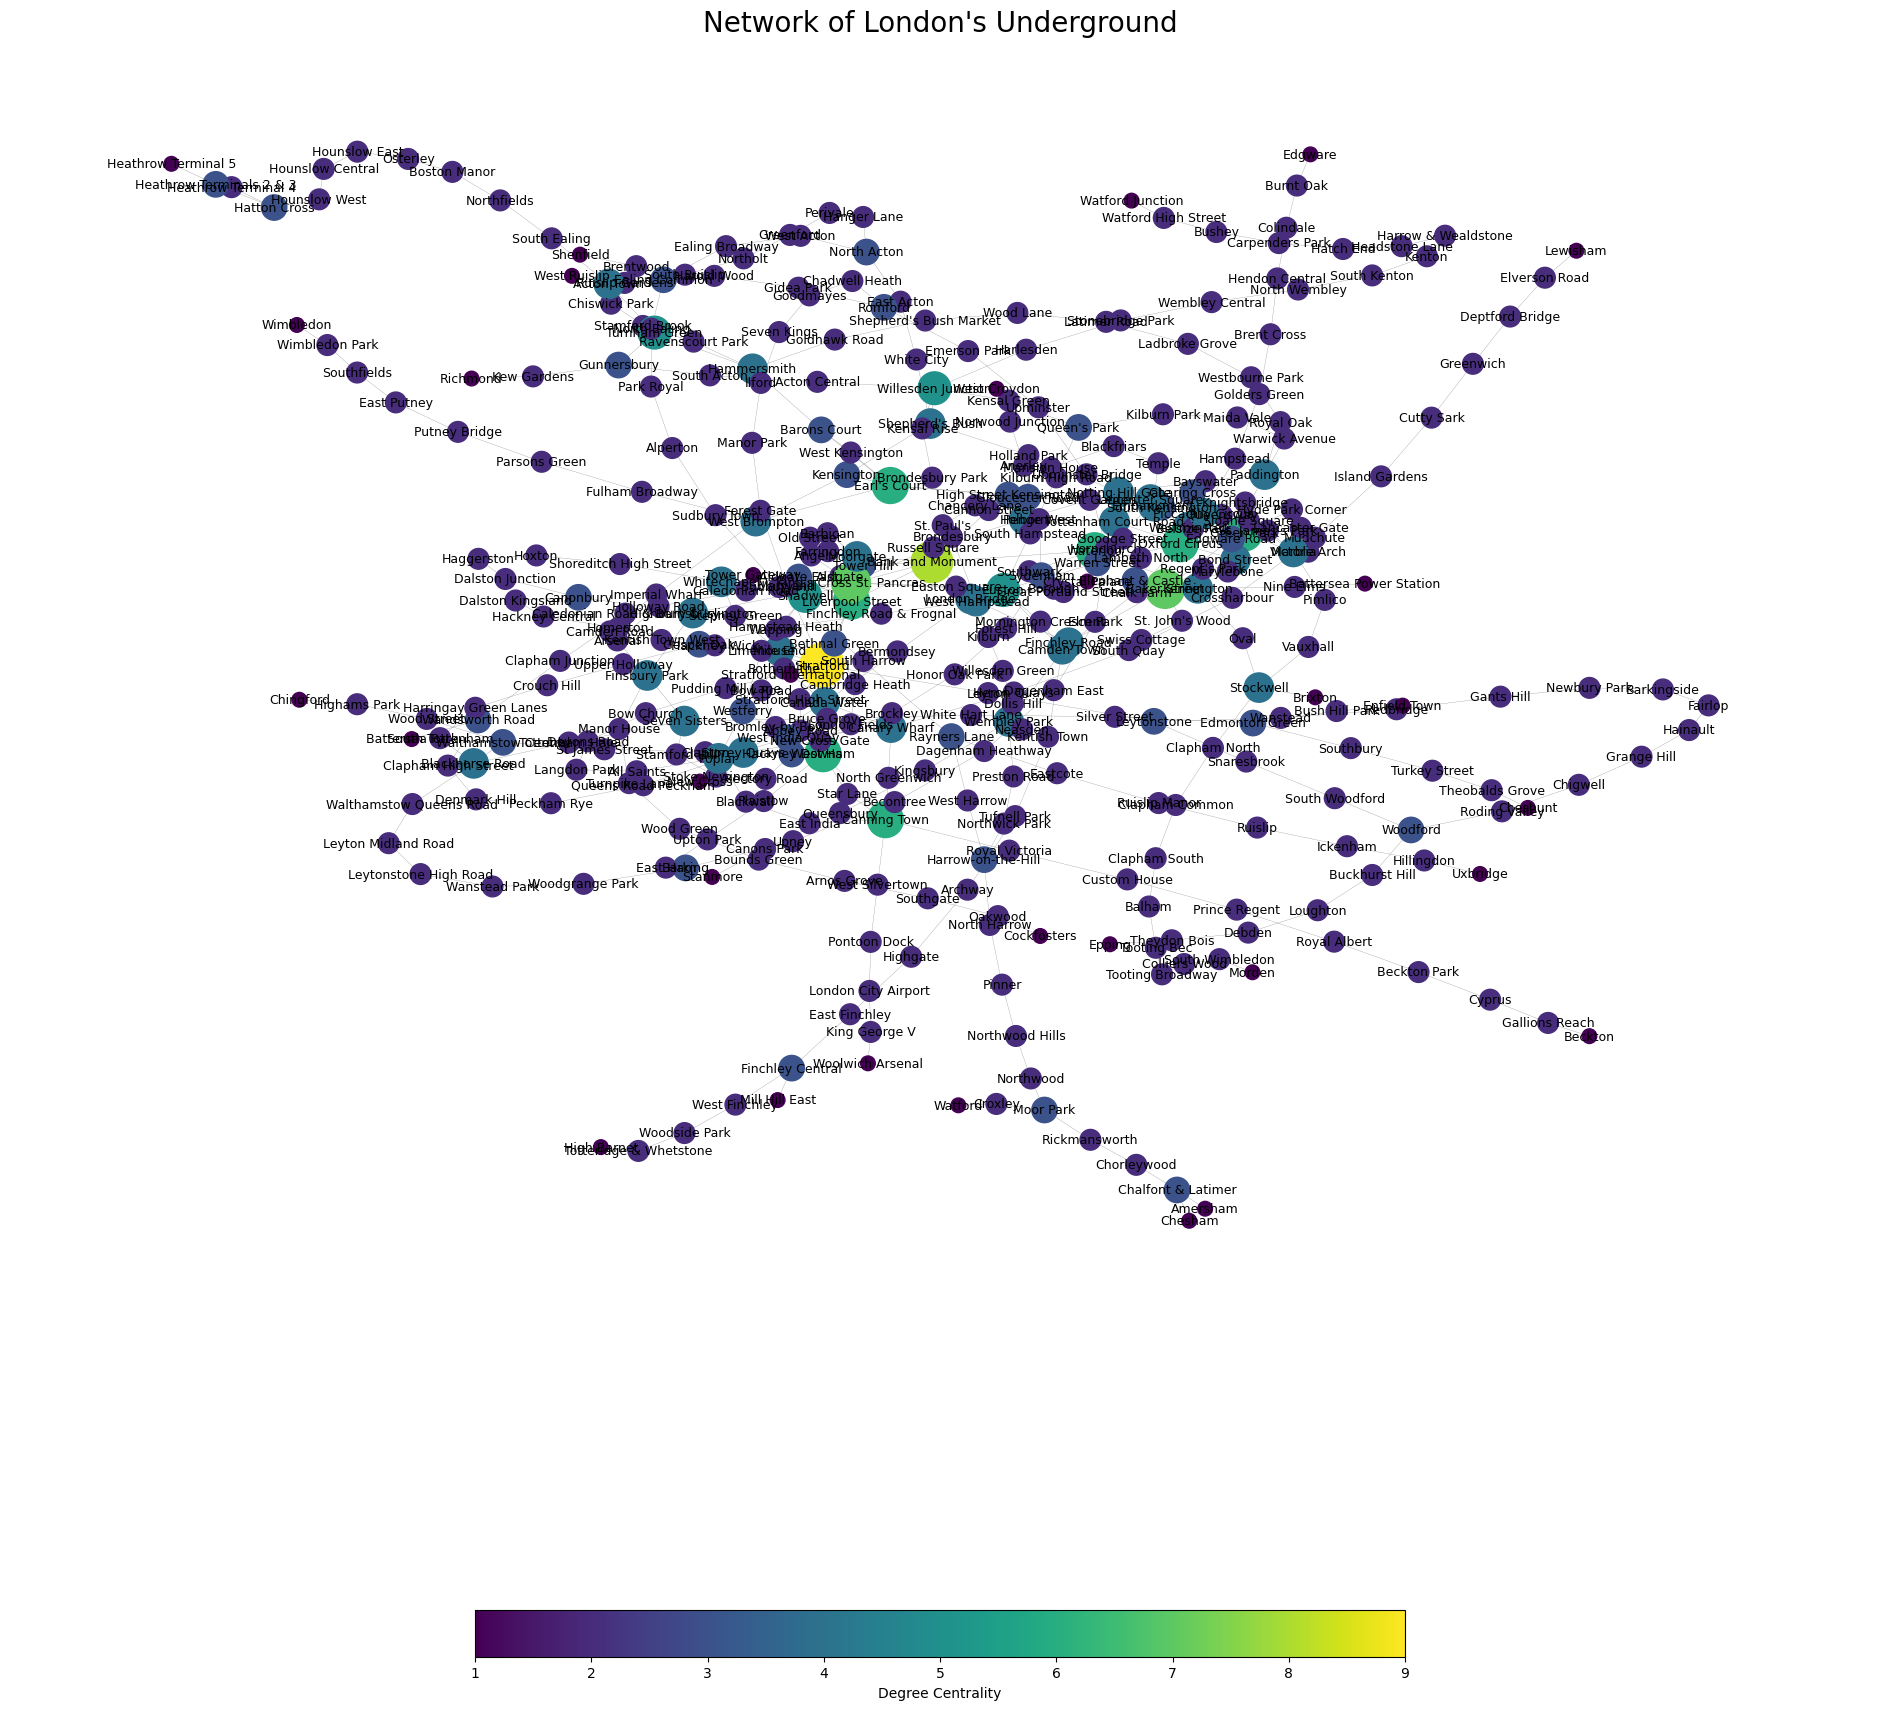

In [18]:
# Plot the graph using the measure of degree

fig, ax = plt.subplots(figsize=(24, 24))

pos=nx.spring_layout(network)
nx.draw_networkx_labels(network, pos, font_size=9, font_color='black')
nx.draw_networkx_edges(network, pos,edge_color='gray', width=0.2)
nod=nx.draw_networkx_nodes(network, pos = pos, node_color= deg_color, node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Network of London's Underground",fontsize=20)
plt.show()

**USE THIS!**

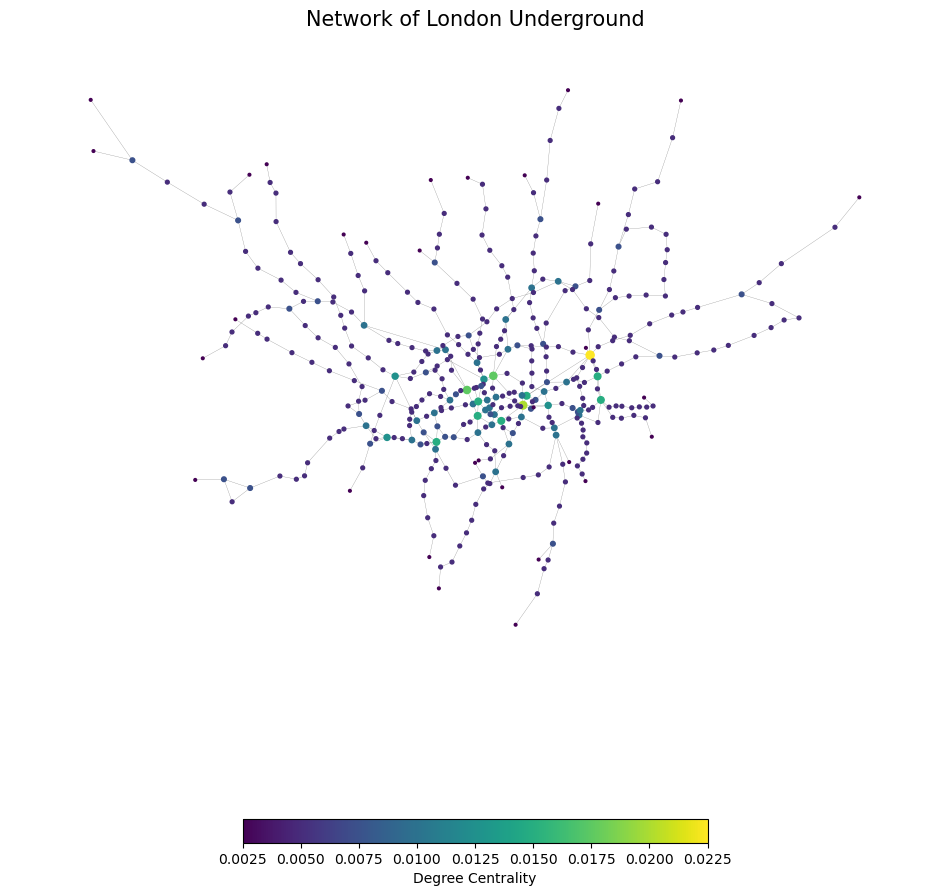

In [19]:
#  Normalised version of degree centrality using networkx function:
deg_network_norm =nx.degree_centrality(network)

nx.set_node_attributes(network,dict(deg_network_norm),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in network.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1500) for i, node in network.nodes(data=True)]


fig, ax = plt.subplots(figsize=(12, 12))

pos = nx.get_node_attributes(network, 'coords')

nx.draw_networkx_edges(network, pos,edge_color='gray', width=0.2)
# nx.draw_networkx_labels(network, pos,font_size=8, font_color='black')
nod=nx.draw_networkx_nodes(network, pos = pos, node_color= deg_color_norm, node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Network of London Underground",fontsize=15)
plt.show()


#Note that values now go from 0 to 1

**(2) Closeness centrality - Topological Closeness Centrality**

In [20]:
#topological closeness centrality
clos_top_network=nx.closeness_centrality(network)

# Add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(network,clos_top_network,'closeness_top')

pd.DataFrame.from_dict(clos_top_network,columns=['closeness_top'],orient='index')[0:10]

,closeness_top
Wembley Park,0.094652
Kingsbury,0.086599
Queensbury,0.079777
Canons Park,0.073923
Stanmore,0.068847
Stratford,0.104384
West Ham,0.097823
Canning Town,0.091575
North Greenwich,0.086843
Canary Wharf,0.089326


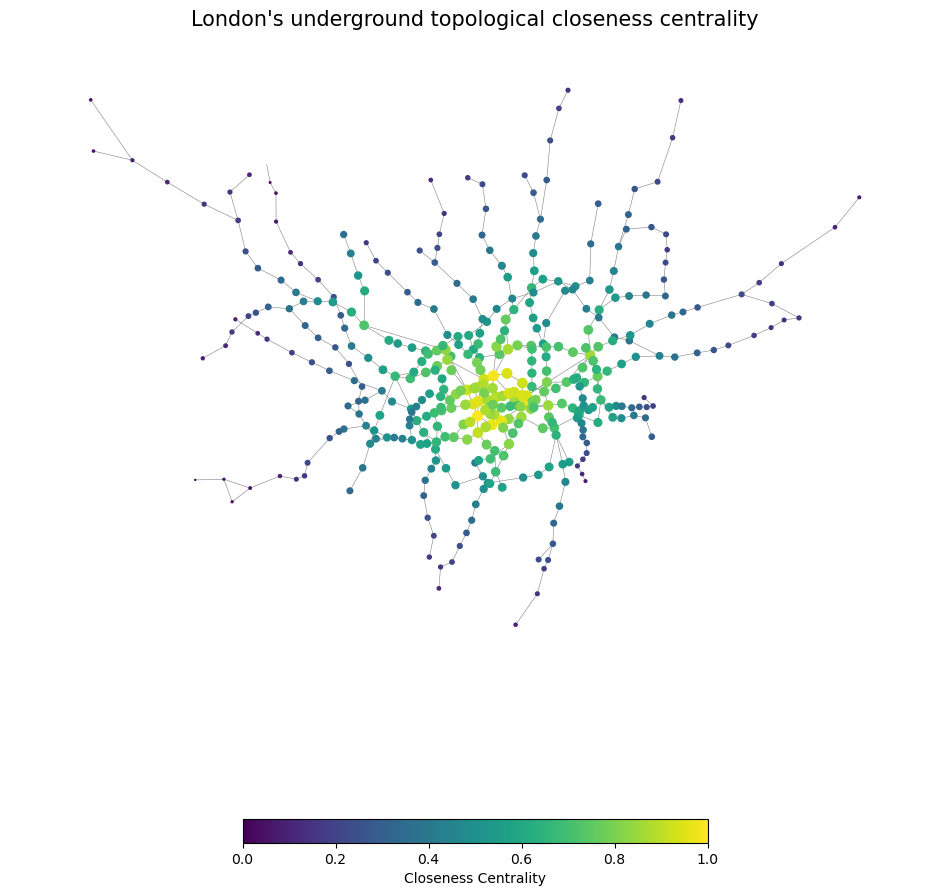

In [21]:
# Set color and size
# Closeness values
clos_val=[(i[1]['closeness_top']) for i in network.nodes(data=True)]


normalised_clos_top_network=[((i[1]['closeness_top']-min(clos_val))/(max(clos_val)-min(clos_val))) for i in network.nodes(data=True)]
clos_top_network_size=[((i[1]['closeness_top']-min(clos_val))/(max(clos_val)-min(clos_val))*50) for i in network.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(network, 'coords')
nx.draw_networkx_edges(network, pos,edge_color='gray', width=0.4)
# nx.draw_networkx_labels(network, pos,font_size=9, font_color='black')
nod=nx.draw_networkx_nodes(network, pos = pos, node_color= normalised_clos_top_network, node_size=clos_top_network_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London's underground topological closeness centrality",fontsize=15)
plt.show()

In [22]:
# The number of connected components
nx.number_connected_components(network)

1

**(3) Betweenness centrality - Topological Betweenness centrality**

In [23]:
#Topological betweenness centrality for the network 
bet_top_network=nx.betweenness_centrality(network)
pd.DataFrame.from_dict(bet_top_network,columns=['betweenness_top'], orient='index')[0:10]

,betweenness_top
Wembley Park,0.135098
Kingsbury,0.014925
Queensbury,0.009975
Canons Park,0.005000
Stanmore,0.000000
Stratford,0.297846
West Ham,0.139344
Canning Town,0.096167
North Greenwich,0.031660
Canary Wharf,0.073286


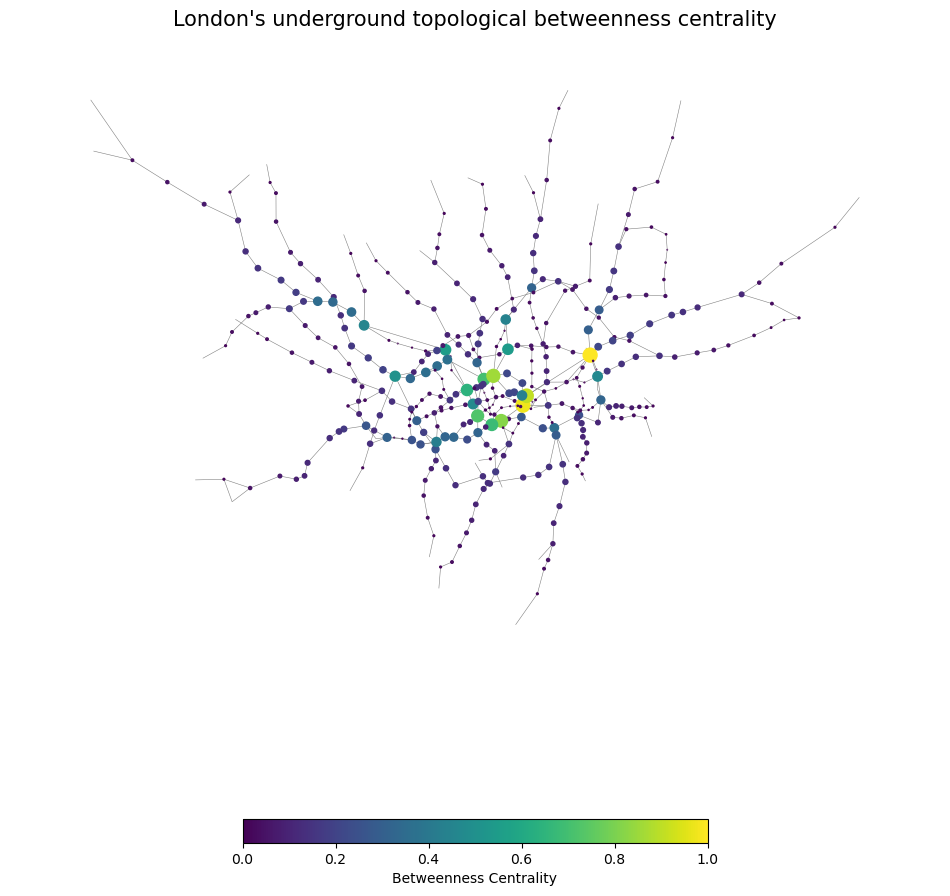

In [24]:
# Add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(network,bet_top_network,'betweenness_top')

betweenness_top_values=[(i[1]['betweenness_top']) for i in network.nodes(data=True)]


# Lets set color and size of nodes according to betweenness values
bet_color_top=[(i[1]['betweenness_top']/max(betweenness_top_values)) for i in network.nodes(data=True)]
bet_size_top=[(i[1]['betweenness_top']/max(betweenness_top_values)*100) for i in network.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(network, 'coords')
nx.draw_networkx_edges(network, pos,edge_color='gray', width=0.4)
# nx.draw_networkx_labels(network, pos,font_size=9, font_color='black')
nod=nx.draw_networkx_nodes(network, pos = pos, node_color= bet_color_top, node_size= bet_size_top)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London's underground topological betweenness centrality",fontsize=15)
plt.show()

In [25]:
# Print node list with attributes
list(network.nodes(data = True))[0:5]

[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672),
   'degree': 4,
   'degree_norm': 0.01,
   'closeness_top': 0.09465215333648841,
   'betweenness_top': 0.1350979134343796}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083),
   'degree': 2,
   'degree_norm': 0.005,
   'closeness_top': 0.08659883091578263,
   'betweenness_top': 0.014924812030075188}),
 ('Queensbury',
  {'coords': (518811.3613368616, 189760.50737704366),
   'degree': 2,
   'degree_norm': 0.005,
   'closeness_top': 0.07977662544874352,
   'betweenness_top': 0.009974937343358397}),
 ('Canons Park',
  {'coords': (518183.29968291725, 191257.26260848),
   'degree': 2,
   'degree_norm': 0.005,
   'closeness_top': 0.07392348918868971,
   'betweenness_top': 0.005}),
 ('Stanmore',
  {'coords': (517580.4596464033, 192537.99948098673),
   'degree': 1,
   'degree_norm': 0.0025,
   'closeness_top': 0.06884681583476764,
   'betweenness_top': 0.0})]

**(4) Katz centrality**

In [26]:
#Topological Katz centrality for the network 
katz_top_network=nx.katz_centrality(network)
pd.DataFrame.from_dict(katz_top_network,columns=['katz_top'], orient='index')[0:10]

,katz_top
Wembley Park,0.057810
Kingsbury,0.047790
Queensbury,0.046735
Canons Park,0.046204
Stanmore,0.041956
Stratford,0.088736
West Ham,0.073185
Canning Town,0.069532
North Greenwich,0.050131
Canary Wharf,0.058425


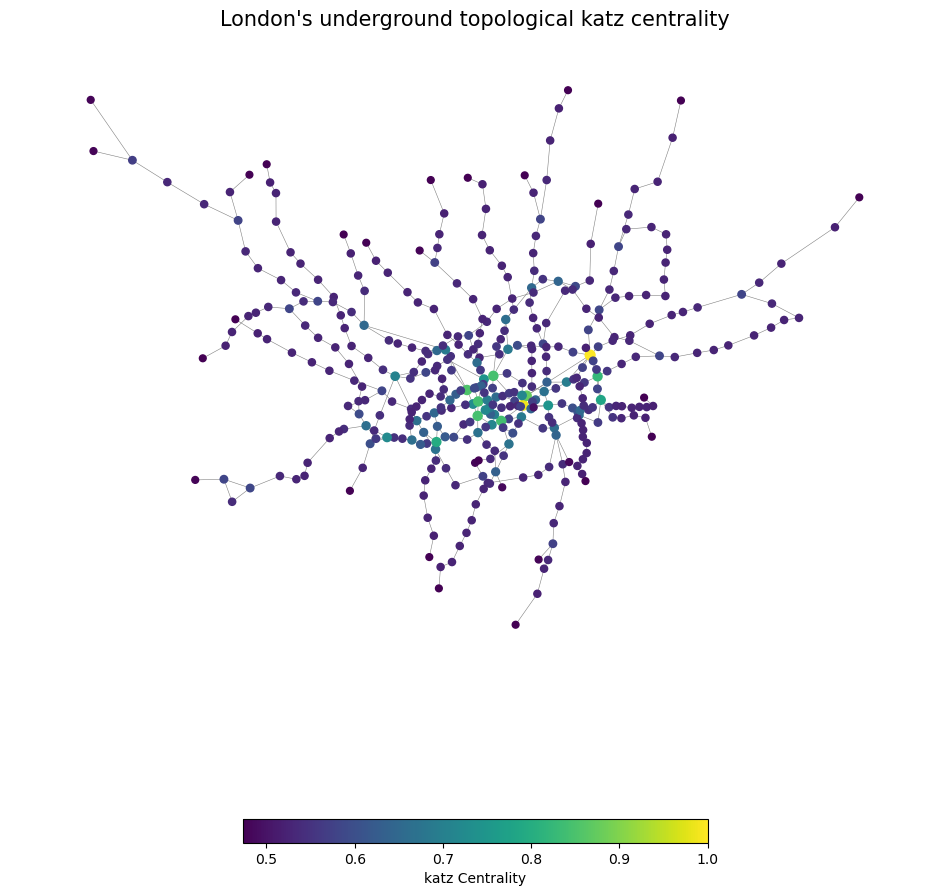

In [27]:
# Add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(network,katz_top_network,'katz_top')

katz_top_values=[(i[1]['katz_top']) for i in network.nodes(data=True)]


# Lets set color and size of nodes according to betweenness values
bet_color_top=[(i[1]['katz_top']/max(katz_top_values)) for i in network.nodes(data=True)]
bet_size_top=[(i[1]['katz_top']/max(katz_top_values)*50) for i in network.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(network, 'coords')
nx.draw_networkx_edges(network, pos,edge_color='gray', width=0.4)
# nx.draw_networkx_labels(network, pos,font_size=9, font_color='black')
nod=nx.draw_networkx_nodes(network, pos = pos, node_color= bet_color_top, node_size= bet_size_top)

plt.colorbar(nod,label="katz Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London's underground topological katz centrality",fontsize=15)
plt.show()

- Calculate the centrality measurement

In [28]:
# Create a DataFrame for centrality measures
centrality_measures = pd.DataFrame({
    # 'Degree': deg_network_norm,
    'Closeness': clos_top_network,
    'Betweenness': bet_top_network,
    'Katz': katz_top_network
})

# Sort each centrality measure and retrieve the top 10 nodes
# top_degree = pd.Series(deg_network_norm).sort_values(ascending=False)[:10]
top_closeness = pd.Series(clos_top_network).sort_values(ascending=False)[:10]
top_betweenness = pd.Series(bet_top_network).sort_values(ascending=False)[:10]
top_katz = pd.Series(katz_top_network).sort_values(ascending=False)[:10]

# Create three separate DataFrames to hold the top 10 nodes for each centrality measure
# top_degree_df = pd.DataFrame({'Top Degree': top_degree})
top_closeness_df = pd.DataFrame({'Top Closeness': top_closeness})
top_betweenness_df = pd.DataFrame({'Top Betweenness': top_betweenness})
top_katz_df = pd.DataFrame({'Top Kaze': top_katz})

# Print out the top 10 nodes for each centrality measure
# print("Top 10 Nodes by Degree Centrality:")
# print(top_degree_df)
print("\nTop 10 Nodes by Closeness Centrality:")
print(top_closeness_df)
print("\nTop 10 Nodes by Betweenness Centrality:")
print(top_betweenness_df)
print("\nTop 10 Nodes by Katz Centrality:")
print(top_katz_df)


Top 10 Nodes by Closeness Centrality:
                          Top Closeness
Green Park                     0.114778
Bank and Monument              0.113572
King's Cross St. Pancras       0.113443
Westminster                    0.112549
Waterloo                       0.112265
Oxford Circus                  0.111204
Bond Street                    0.110988
Farringdon                     0.110742
Angel                          0.110742
Moorgate                       0.110314

Top 10 Nodes by Betweenness Centrality:
                          Top Betweenness
Stratford                        0.297846
Bank and Monument                0.290489
Liverpool Street                 0.270807
King's Cross St. Pancras         0.255307
Waterloo                         0.243921
Green Park                       0.215835
Euston                           0.208324
Westminster                      0.203335
Baker Street                     0.191568
Finchley Road                    0.165085

Top 10 Nodes by K

In [29]:
# Create a DataFrame to hold the top 10 nodes for each centrality measure
top_nodes_df = pd.DataFrame({
    'Closeness Name': top_closeness.index,
    'Closeness Values': top_closeness.values,
    'Betweenness Name': top_betweenness.index,
    'Betweenness Values': top_betweenness.values,
    'Katz Name': top_katz.index,
    'Katz Values': top_katz.values
})

# Assuming the 'Rank' column is just an index starting from 1 to 10
top_nodes_df.index = range(1, 11)
top_nodes_df.index.name = 'Rank'

# Print the DataFrame
print(top_nodes_df)

                Closeness Name  Closeness Values          Betweenness Name  \
Rank                                                                         
1                   Green Park          0.114778                 Stratford   
2            Bank and Monument          0.113572         Bank and Monument   
3     King's Cross St. Pancras          0.113443          Liverpool Street   
4                  Westminster          0.112549  King's Cross St. Pancras   
5                     Waterloo          0.112265                  Waterloo   
6                Oxford Circus          0.111204                Green Park   
7                  Bond Street          0.110988                    Euston   
8                   Farringdon          0.110742               Westminster   
9                        Angel          0.110742              Baker Street   
10                    Moorgate          0.110314             Finchley Road   

      Betweenness Values                 Katz Name  Katz Values

In [30]:
top_nodes_df.to_csv('top_nodes.csv')

### 1.2 Impact measures:

**(1) The global efficiency**

In [31]:
# Calculate global efficiency of the network
efficiency = nx.global_efficiency(network)

In [32]:
print(f"The global efficiency of the network is: {efficiency}")

The global efficiency of the network is: 0.1012561935972123


**(2) Maximum connected component**

In [33]:
largest_cc = len(max(nx.connected_components(network), key=len))

In [34]:
print(f"The maximum connected component of the network is: {largest_cc}")

The maximum connected component of the network is: 401


- Remove nodes

In [35]:
# Define a function to remove nodes and calculate the measures
def non_sequential_removal(G, nodes_to_remove):
    
    # Create copies of the graph to work with
    working_graph = G.copy()
    
    # Initialize lists to store the measures
    global_efficiencies = []
    largest_cc_sizes = []
    
    # Remove nodes and calculate measures
    for node in nodes_to_remove:
        # Remove the node
        working_graph.remove_node(node)

        global_efficiency = nx.global_efficiency(working_graph)
        global_efficiencies.append(global_efficiency)
        
        # Calculate the size of the largest connected component
        largest_cc_size = len(max(nx.connected_components(working_graph), key=len))
        largest_cc_sizes.append(largest_cc_size)
    
    # Create a DataFrame from the results
    measures_df = pd.DataFrame({
        'removed_node': nodes_to_remove,
        'global_efficiency': global_efficiencies,
        'max_cc_size': largest_cc_sizes
    })
    
    return measures_df

In [36]:
# Call the function with the top_degree nodes
non_sequential_closeness = non_sequential_removal(network, top_closeness_df.index.tolist())
non_sequential_betweenness = non_sequential_removal(network, top_betweenness_df.index.tolist())
non_sequential_katz = non_sequential_removal(network, top_katz_df.index.tolist())

# Display the results
print(non_sequential_closeness)
print(non_sequential_betweenness)
print(non_sequential_katz)

               removed_node  global_efficiency  max_cc_size
0                Green Park           0.099190          400
1         Bank and Monument           0.094872          399
2  King's Cross St. Pancras           0.087934          398
3               Westminster           0.087372          397
4                  Waterloo           0.084859          396
5             Oxford Circus           0.082781          395
6               Bond Street           0.082581          394
7                Farringdon           0.082600          393
8                     Angel           0.082622          392
9                  Moorgate           0.081670          389
               removed_node  global_efficiency  max_cc_size
0                 Stratford           0.088917          379
1         Bank and Monument           0.085862          378
2          Liverpool Street           0.084963          377
3  King's Cross St. Pancras           0.078498          371
4                  Waterloo           0.

In [37]:
def sequential_removal(G, centrality_func, alpha=None):
    results = []
    current_G = G.copy()

    # Remove 10 nodes based on centrality for each type
    for i in range(10):  
        # Calculate centrality
        if centrality_func == nx.katz_centrality_numpy and alpha is not None:
            centrality = centrality_func(current_G, alpha=alpha)
        else:
            centrality = centrality_func(current_G)
        
        # Find the node with the highest centrality and remove it
        max_centrality_node = max(centrality, key=centrality.get)
        current_G.remove_node(max_centrality_node)
        
        # Calculate global efficiency
        global_efficiency = nx.global_efficiency(current_G)
        
        # Calculate the size of the largest connected component
        if nx.is_connected(current_G):
            max_cc_size = len(current_G.nodes())
        else:
            largest_cc = max(nx.connected_components(current_G), key=len)
            max_cc_size = len(largest_cc)

        # Record the results
        results.append({
            'iteration': i + 1,
            'removed_node': max_centrality_node,
            'global_efficiency': global_efficiency,
            'max_cc_size': max_cc_size
        })
    
    return results

def analyze_centrality_removal(G, centrality_func, alpha=None):
    return sequential_removal(G, centrality_func, alpha)

def perform_analysis(G):
    # Analyze three types of centrality separately
    closeness_results = analyze_centrality_removal(G, nx.closeness_centrality)
    betweenness_results = analyze_centrality_removal(G, nx.betweenness_centrality)
    katz_results = analyze_centrality_removal(G, nx.katz_centrality_numpy, alpha=0.005)

    # Return all results
    return {
        'Closeness': closeness_results,
        'Betweenness': betweenness_results,
        'Katz': katz_results
    }

# Execute the analysis
results = perform_analysis(network)

# Print the results
for centrality_type, analysis_results in results.items():
    print(f"Sequential results for {centrality_type}:")
    for result in analysis_results:
        print(result)

Sequential results for Closeness:
{'iteration': 1, 'removed_node': 'Green Park', 'global_efficiency': 0.09918991960788402, 'max_cc_size': 400}
{'iteration': 2, 'removed_node': "King's Cross St. Pancras", 'global_efficiency': 0.09443475025566316, 'max_cc_size': 399}
{'iteration': 3, 'removed_node': 'Waterloo', 'global_efficiency': 0.09181648060183005, 'max_cc_size': 398}
{'iteration': 4, 'removed_node': 'Bank and Monument', 'global_efficiency': 0.08542563066911478, 'max_cc_size': 397}
{'iteration': 5, 'removed_node': 'West Hampstead', 'global_efficiency': 0.08054424756502003, 'max_cc_size': 396}
{'iteration': 6, 'removed_node': 'Canada Water', 'global_efficiency': 0.05810104159173278, 'max_cc_size': 226}
{'iteration': 7, 'removed_node': 'Stratford', 'global_efficiency': 0.051883620553389555, 'max_cc_size': 226}
{'iteration': 8, 'removed_node': "Earl's Court", 'global_efficiency': 0.05035000093626794, 'max_cc_size': 225}
{'iteration': 9, 'removed_node': "Shepherd's Bush", 'global_efficie

- Plot

In [38]:
# Combine the non sequential DataFrames into one, adding iteration, 'Centrality' and 'Strategy' columns

non_sequential_closeness['iteration'] = non_sequential_closeness.index + 1
non_sequential_betweenness['iteration'] = non_sequential_betweenness.index + 1
non_sequential_katz['iteration'] = non_sequential_katz.index + 1

non_sequential_closeness['Centrality'] = 'Closeness'
non_sequential_betweenness['Centrality'] = 'Betweenness'
non_sequential_katz['Centrality'] = 'Katz'

non_sequential_closeness['Strategy'] = 'Non-Sequential'
non_sequential_betweenness['Strategy'] = 'Non-Sequential'
non_sequential_katz['Strategy'] = 'Non-Sequential'

# Concatenate all the DataFrames into one
combined_non_sequential = pd.concat([
    non_sequential_closeness,
    non_sequential_betweenness,
    non_sequential_katz
])

In [39]:
combined_non_sequential.head(10)

,removed_node,global_efficiency,max_cc_size,iteration,Centrality,Strategy
0,Green Park,0.099190,400,1,Closeness,Non-Sequential
1,Bank and Monument,0.094872,399,2,Closeness,Non-Sequential
2,King's Cross St. Pancras,0.087934,398,3,Closeness,Non-Sequential
3,Westminster,0.087372,397,4,Closeness,Non-Sequential
4,Waterloo,0.084859,396,5,Closeness,Non-Sequential
5,Oxford Circus,0.082781,395,6,Closeness,Non-Sequential
6,Bond Street,0.082581,394,7,Closeness,Non-Sequential
7,Farringdon,0.082600,393,8,Closeness,Non-Sequential
8,Angel,0.082622,392,9,Closeness,Non-Sequential
9,Moorgate,0.081670,389,10,Closeness,Non-Sequential


In [40]:
# Assuming 'results' is the output from perform_analysis(network)
sequential_closeness_df = pd.DataFrame(results['Closeness'])
sequential_betweenness_df = pd.DataFrame(results['Betweenness'])
sequential_katz_df = pd.DataFrame(results['Katz'])

# Add 'Centrality' and 'Strategy' columns
sequential_closeness_df['Centrality'] = 'Closeness'
sequential_betweenness_df['Centrality'] = 'Betweenness'
sequential_katz_df['Centrality'] = 'Katz'

sequential_closeness_df['Strategy'] = 'Sequential'
sequential_betweenness_df['Strategy'] = 'Sequential'
sequential_katz_df['Strategy'] = 'Sequential'

# Combine the DataFrames into one
combined_sequential = pd.concat([
    sequential_closeness_df,
    sequential_betweenness_df,
    sequential_katz_df
])

In [41]:
combined_sequential.head(10)

,iteration,removed_node,global_efficiency,max_cc_size,Centrality,Strategy
0,1,Green Park,0.099190,400,Closeness,Sequential
1,2,King's Cross St. Pancras,0.094435,399,Closeness,Sequential
2,3,Waterloo,0.091816,398,Closeness,Sequential
3,4,Bank and Monument,0.085426,397,Closeness,Sequential
4,5,West Hampstead,0.080544,396,Closeness,Sequential
5,6,Canada Water,0.058101,226,Closeness,Sequential
6,7,Stratford,0.051884,226,Closeness,Sequential
7,8,Earl's Court,0.050350,225,Closeness,Sequential
8,9,Shepherd's Bush,0.044395,195,Closeness,Sequential
9,10,Oxford Circus,0.042958,194,Closeness,Sequential


In [42]:
combined = pd.concat([
    combined_non_sequential,
    combined_sequential
])

combined.head(10)

,removed_node,global_efficiency,max_cc_size,iteration,Centrality,Strategy
0,Green Park,0.099190,400,1,Closeness,Non-Sequential
1,Bank and Monument,0.094872,399,2,Closeness,Non-Sequential
2,King's Cross St. Pancras,0.087934,398,3,Closeness,Non-Sequential
3,Westminster,0.087372,397,4,Closeness,Non-Sequential
4,Waterloo,0.084859,396,5,Closeness,Non-Sequential
5,Oxford Circus,0.082781,395,6,Closeness,Non-Sequential
6,Bond Street,0.082581,394,7,Closeness,Non-Sequential
7,Farringdon,0.082600,393,8,Closeness,Non-Sequential
8,Angel,0.082622,392,9,Closeness,Non-Sequential
9,Moorgate,0.081670,389,10,Closeness,Non-Sequential


In [43]:
combined.to_csv('combined.csv')

In [44]:
# Insert initial values for each group in 'Centrality' and 'Strategy'
initial_data = []
for (centrality, strategy), group in combined.groupby(['Centrality', 'Strategy']):
    initial_data.append({
        'iteration': 0,
        'global_efficiency': efficiency,
        'max_cc_size': largest_cc,
        'Centrality': centrality,
        'Strategy': strategy
    })

# Append these initial data points to the existing DataFrame
combined = pd.concat([pd.DataFrame(initial_data), combined], ignore_index=True)
combined.sort_values(by=['Centrality', 'Strategy', 'iteration'], inplace=True)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

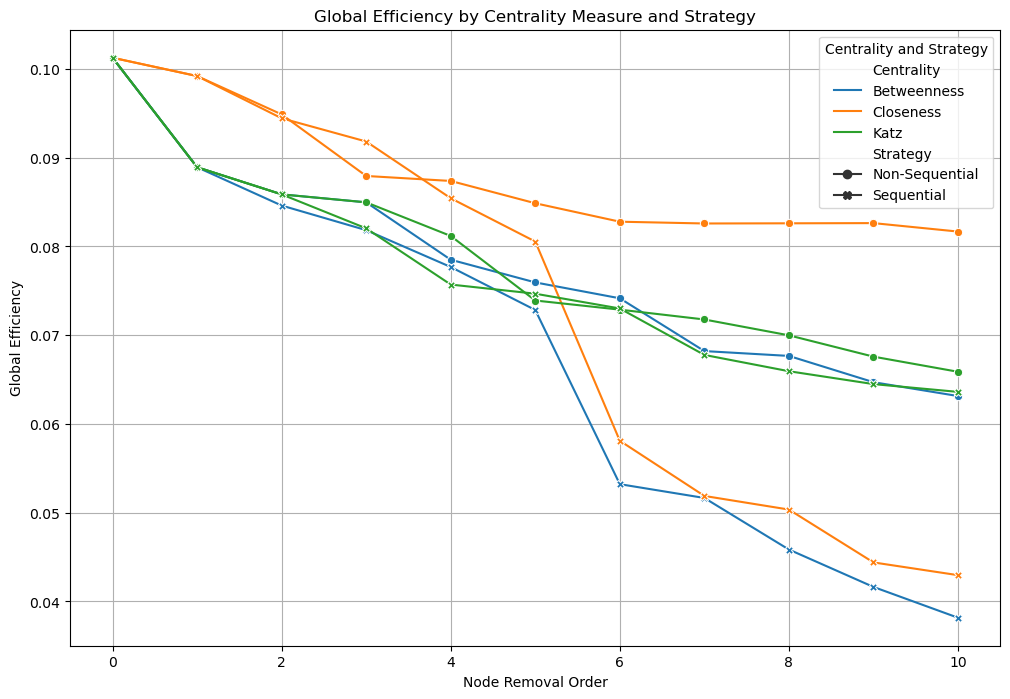

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

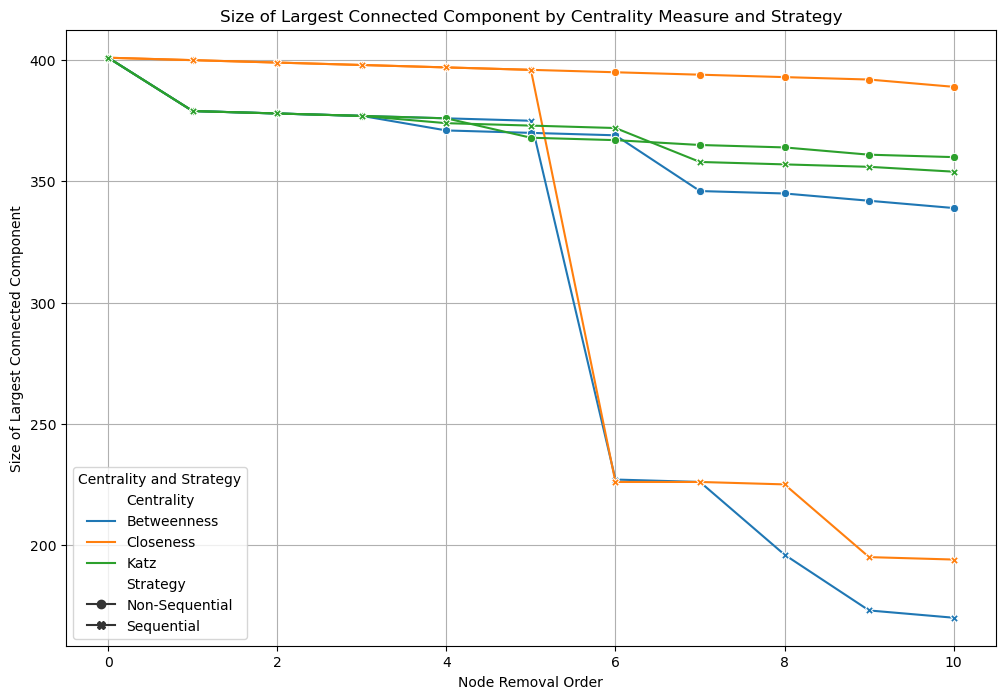

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a plot for Global Efficiency
plt.figure(figsize=(12, 8))
global_efficiency_plot = sns.lineplot(
    data=combined,
    x='iteration', y='global_efficiency', 
    hue='Centrality', style='Strategy',
    markers=True, dashes=False
)
global_efficiency_plot.set_title('Global Efficiency by Centrality Measure and Strategy')
global_efficiency_plot.set_xlabel('Node Removal Order')
global_efficiency_plot.set_ylabel('Global Efficiency')
global_efficiency_plot.legend(title='Centrality and Strategy')
plt.grid(True)
plt.show()

# Create a plot for Size of Largest Connected Component
plt.figure(figsize=(12, 8))
connected_component_plot = sns.lineplot(
    data=combined,
    x='iteration', y='max_cc_size', 
    hue='Centrality', style='Strategy',
    markers=True, dashes=False
)
connected_component_plot.set_title('Size of Largest Connected Component by Centrality Measure and Strategy')
connected_component_plot.set_xlabel('Node Removal Order')
connected_component_plot.set_ylabel('Size of Largest Connected Component')
connected_component_plot.legend(title='Centrality and Strategy')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

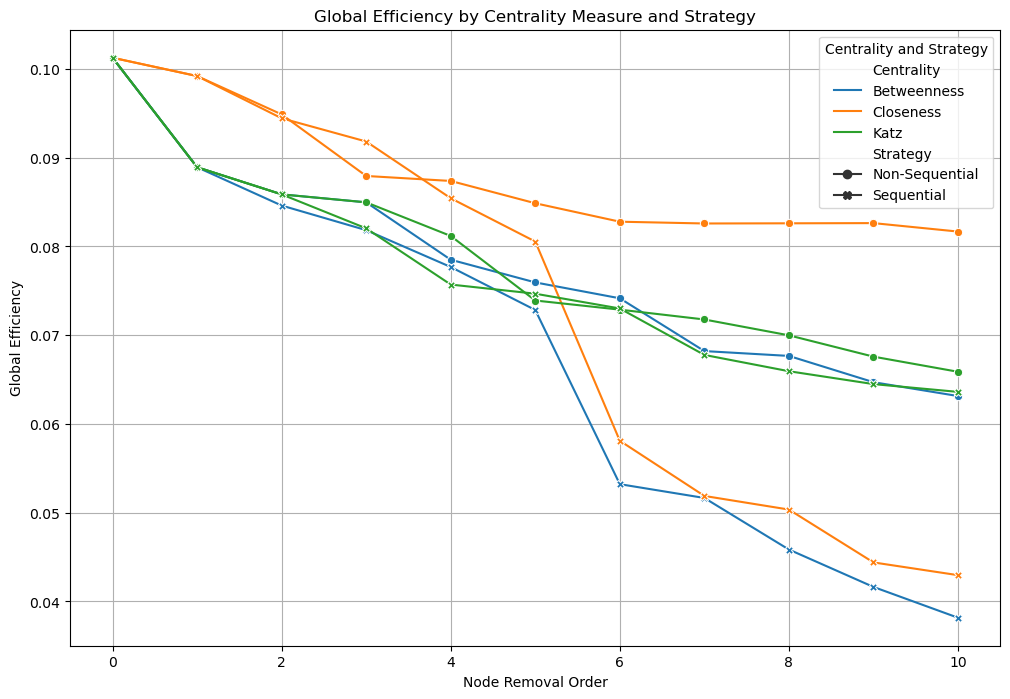

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

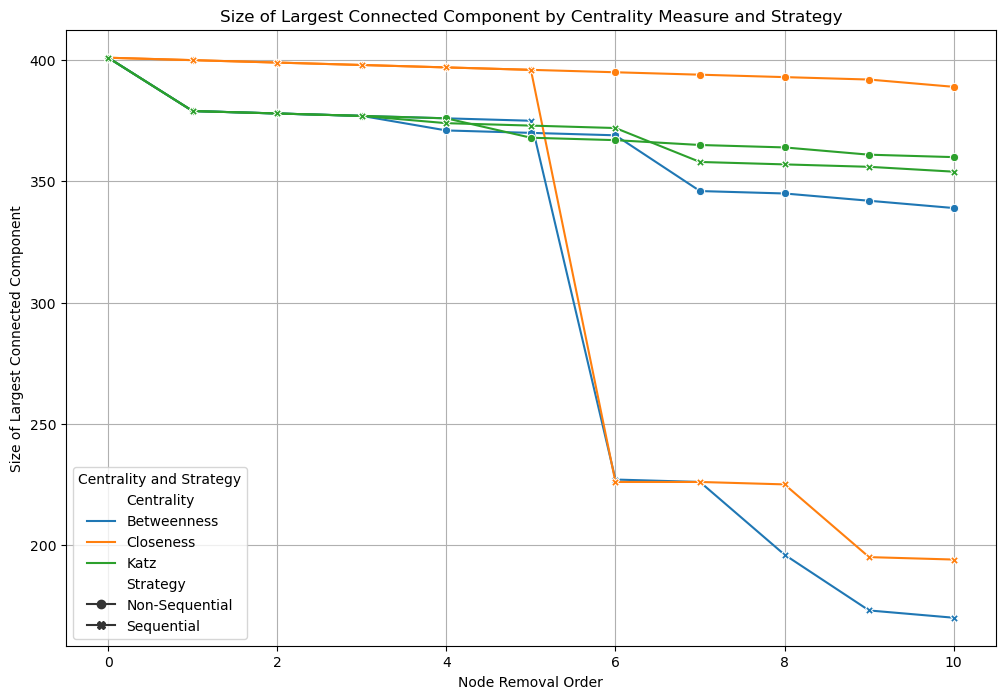

In [46]:
# Create a plot for Global Efficiency
plt.figure(figsize=(12, 8))
global_efficiency_plot = sns.lineplot(
    data=combined,
    x='iteration', y='global_efficiency', 
    hue='Centrality', style='Strategy',
    markers=True, dashes=False
)
global_efficiency_plot.set_title('Global Efficiency by Centrality Measure and Strategy')
global_efficiency_plot.set_xlabel('Node Removal Order')
global_efficiency_plot.set_ylabel('Global Efficiency')
global_efficiency_plot.legend(title='Centrality and Strategy')
plt.grid(True)
plt.show()

# Create a plot for Size of Largest Connected Component
plt.figure(figsize=(12, 8))
connected_component_plot = sns.lineplot(
    data=combined,
    x='iteration', y='max_cc_size', 
    hue='Centrality', style='Strategy',
    markers=True, dashes=False
)
connected_component_plot.set_title('Size of Largest Connected Component by Centrality Measure and Strategy')
connected_component_plot.set_xlabel('Node Removal Order')
connected_component_plot.set_ylabel('Size of Largest Connected Component')
connected_component_plot.legend(title='Centrality and Strategy')
plt.grid(True)
plt.show()

## 2. Flows: weighted network

### 2.1 Adjusting Centrality Measures

In [47]:
# Because we need to take the reciprocal of the value flow later, we need to first check the nodes with a flow of 0

# Check if there are any edges with a 'flows' attribute of 0
flows_zero = any((data['flows'] == 0 for _, _, data in network.edges(data=True)))

print("Contains edges with 'flows' value of 0:", flows_zero)

Contains edges with 'flows' value of 0: True


In [48]:
# Define a small value that will replace 0
small_value = 1e-10

# Iterate over all edges in the network
for u, v, data in network.edges(data=True):
    # Check if 'flows' attribute is 0
    if data['flows'] == 0:
        # Replace the 0 with a small value
        data['flows'] = small_value

# Now you can safely take the reciprocal without dividing by zero
for u, v, data in network.edges(data=True):
    # Take the reciprocal of 'flows'
    data['flows_reciprocal'] = 1 / data['flows']

In [49]:
## Weighted betweenness centrality:
# Compute the betweenness centrality for the network, considering the weight:
bet_network_w=nx.betweenness_centrality(network, weight='flows_reciprocal')
df_betweenness_w = pd.DataFrame.from_dict(bet_network_w, orient='index', columns=['betweenness_w'])
df_sorted = df_betweenness_w.sort_values(by='betweenness_w', ascending=False)[ :10]
print(df_sorted.head(10))

                   betweenness_w
Green Park              0.572403
Bank and Monument       0.505448
Waterloo                0.416432
Westminster             0.381212
Liverpool Street        0.336817
Stratford               0.331291
Bond Street             0.291830
Euston                  0.284076
Oxford Circus           0.270605
Warren Street           0.254120


In [50]:
# Comparing rankings without weight
top_betweenness = pd.Series(bet_top_network).sort_values(ascending=False)[:10]
top_betweenness_df = pd.DataFrame({'Top Betweenness': top_betweenness})
print(top_betweenness_df)

                          Top Betweenness
Stratford                        0.297846
Bank and Monument                0.290489
Liverpool Street                 0.270807
King's Cross St. Pancras         0.255307
Waterloo                         0.243921
Green Park                       0.215835
Euston                           0.208324
Westminster                      0.203335
Baker Street                     0.191568
Finchley Road                    0.165085


### 2.2 Modifying Measures for Node Removal Impact

Only text

### 2.3 Evaluating the Impact of Removing Top Nodes

In [51]:
# A too large weight range may affect the final result, so first check the range of weights
flows = [d['flows_reciprocal'] for u, v, d in network.edges(data=True)]

print("Minimum weight:", min(flows))
print("Maximum weight:", max(flows))
print("Average weight:", sum(flows) / len(flows))

Minimum weight: 4.555829411523515e-06
Maximum weight: 10000000000.0
Average weight: 64239828.69400155


In [52]:
# Therefore, we need to linearly scale the weights to ensure that the results are not too large or too small

# Calculate the current minimum and maximum weights
min_flow = min(flows)
max_flow = max(flows)

# Ensure the minimum value is not zero to avoid division by zero errors
min_flow = max(min_flow, 1e-10)

# Scale all weights to the range [1, 1000]
scaled_flows = [1 + 999 * (f - min_flow) / (max_flow - min_flow) for f in flows]

# Update the weights in the graph
for (u, v, d), new_weight in zip(network.edges(data=True), scaled_flows):
    d['scaled_flows_reciprocal'] = new_weight

# Recalculate the average shortest path length
try:
    new_avg_length = nx.average_shortest_path_length(network, weight='scaled_flows_reciprocal')
    print("New average shortest path length:", new_avg_length)
except nx.NetworkXError as e:
    print("Error during calculation:", e)

New average shortest path length: 33.45125935166577


In [53]:
# Check it again
flows = [d['scaled_flows_reciprocal'] for u, v, d in network.edges(data=True)]

print("Minimum weight:", min(flows))
print("Maximum weight:", max(flows))
print("Average weight:", sum(flows) / len(flows))

Minimum weight: 1.0
Maximum weight: 1000.0
Average weight: 7.417558886530307


**Average Shortest Paths**

In [54]:
# Define the shortest path
def calculate_average_path_length(G, weight='scaled_flows_reciprocal'):
    try:
        return nx.average_shortest_path_length(G, weight=weight)
    except nx.NetworkXError:
        return float('inf')

def non_sequential_removal(G, nodes_to_remove):
    working_graph = G.copy()
    avg_path_lengths_before_removal = []
    avg_path_lengths_after_removal = []

    for node in nodes_to_remove:
        # Calculate and record average path length before removal
        avg_length_before = calculate_average_path_length(working_graph, weight='scaled_flows_reciprocal')
        avg_path_lengths_before_removal.append(avg_length_before)
        
        working_graph.remove_node(node)
        
        # Calculate and record average path length after removal if the graph is not empty
        avg_length_after = calculate_average_path_length(working_graph, weight='scaled_flows_reciprocal')
        avg_path_lengths_after_removal.append(avg_length_after)
        
    # Creating a DataFrame for better visualization
    measures_df = pd.DataFrame({
        'removed_node': nodes_to_remove,
        'average_path_before': avg_path_lengths_before_removal,
        'average_path_after': avg_path_lengths_after_removal
    })

    return measures_df

betweenness_w = df_betweenness_w.sort_values(by='betweenness_w', ascending=False).head(3)
non_sequential_betweenness = non_sequential_removal(network, betweenness_w.index.tolist())
print(non_sequential_betweenness)

        removed_node  average_path_before  average_path_after
0         Green Park            33.451259           33.779499
1  Bank and Monument            33.779499           34.387640
2           Waterloo            34.387640           34.727909


In [55]:
# Define the shortest path
def calculate_average_path_length(G, weight='scaled_flows_reciprocal'):
    try:
        return nx.average_shortest_path_length(G, weight=weight)
    except nx.NetworkXError:
        return float('inf')
        
def sequential_removal(G, centrality_func, weight=None):
    results = []
    current_G = G.copy()

    for i in range(3): 
        if weight:
            centrality = centrality_func(current_G, weight=weight)
        else:
            centrality = centrality_func(current_G)
        
        # Find the node with the highest centrality and remove it
        max_centrality_node = max(centrality, key=centrality.get)

        # Calculate shortest path before removal
        average_path_before = calculate_average_path_length(current_G, weight='scaled_flows_reciprocal')

        # Remove the node
        current_G.remove_node(max_centrality_node)

        # Calculate shortest path after removal
        average_path_after = calculate_average_path_length(current_G, weight='scaled_flows_reciprocal')

        # Record the results
        results.append({
            'removed_node': max_centrality_node,
            'average_path_before': average_path_before,
            'average_path_after': average_path_after
        })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

def analyze_centrality_removal(G, centrality_func, weight=None):
    return sequential_removal(G, centrality_func, weight)

def perform_analysis(G):
    # Analyze weighted betweenness centrality
    betweenness_results = analyze_centrality_removal(G, nx.betweenness_centrality, weight='flows_reciprocal')

    # Return the result
    return betweenness_results

# Execute the analysis
results_df = perform_analysis(network)

# Print the results
print(results_df)

               removed_node  average_path_before  average_path_after
0                Green Park            33.451259           33.779499
1         Bank and Monument            33.779499           34.387640
2  King's Cross St. Pancras            34.387640           36.038885


In [56]:
def calculate_average_path_length(G, weight='scaled_flows_reciprocal'):
    try:
        return nx.average_shortest_path_length(G, weight=weight)
    except nx.NetworkXError:
        return float('inf')
        
def non_sequential_removal(G, nodes_to_remove):
    working_graph = G.copy()
    average_paths_before = []
    average_paths_after = []
    for node in nodes_to_remove:
        average_path_before = calculate_average_path_length(working_graph, weight='scaled_flows_reciprocal')
        average_paths_before.append(average_path_before)
        working_graph.remove_node(node)
        average_path_after = calculate_average_path_length(working_graph, weight='scaled_flows_reciprocal')
        average_paths_after.append(average_path_after)
    measures_df = pd.DataFrame({
        'removed_node': nodes_to_remove,
        'average_path_before': average_paths_before,
        'average_path_after': average_paths_after
    })
    return measures_df

betweenness_w = df_betweenness_w.sort_values(by='betweenness_w', ascending=False).head(3)
non_sequential_betweenness_w = non_sequential_removal(network, betweenness_w.index.tolist())

# Modify here to print results in the specified format
shortest_average_paths = list(non_sequential_betweenness_w['average_path_before']) + [non_sequential_betweenness_w['average_path_after'].iloc[-1]]

# Print the value
for result in shortest_average_paths:
    print(result)

33.45125935166577
33.779498746913795
34.38763995420673
34.72790906679957


In [57]:
def calculate_average_path_length(G, weight='scaled_flows_reciprocal'):
    try:
        return nx.average_shortest_path_length(G, weight=weight)
    except nx.NetworkXError:
        return float('inf')

def sequential_removal(G, centrality_func, weight=None):
    results = []
    current_G = G.copy()

    for i in range(3):  # Remove 3 nodes based on centrality for each type
        # Calculate weighted centrality if weight is specified
        if weight:
            centrality = centrality_func(current_G, weight=weight)
        else:
            centrality = centrality_func(current_G)
        
        # Find the node with the highest centrality and remove it
        max_centrality_node = max(centrality, key=centrality.get)

        # Calculate average shortest path before removal
        average_path_before = calculate_average_path_length(current_G, weight='scaled_flows_reciprocal')

        # Remove the node
        current_G.remove_node(max_centrality_node)

        # Calculate average shortest path after removal
        average_path_after = calculate_average_path_length(current_G, weight='scaled_flows_reciprocal')

        # Record the results
        results.append({
            'iteration': i + 1,
            'removed_node': max_centrality_node,
            'average_path_before': average_path_before,
            'average_path_after': average_path_after
        })
    
    return results

def analyze_centrality_removal(G, centrality_func, weight=None):
    return sequential_removal(G, centrality_func, weight)

def perform_analysis(G):
    # Analyze weighted betweenness centrality
    betweenness_results = analyze_centrality_removal(G, nx.betweenness_centrality, weight='flows_reciprocal')

    # Return the result
    return betweenness_results

# Execute the analysis
results = perform_analysis(network)

# Print the results
for result in results:
    # Print the 'average_path_before' for the first iteration
    if result['iteration'] == 1:
        print(result['average_path_before'])
    # Print the 'average_path_after' for every iteration
    print(result['average_path_after'])

33.45125935166577
33.779498746913795
34.38763995420673
36.03888459939811


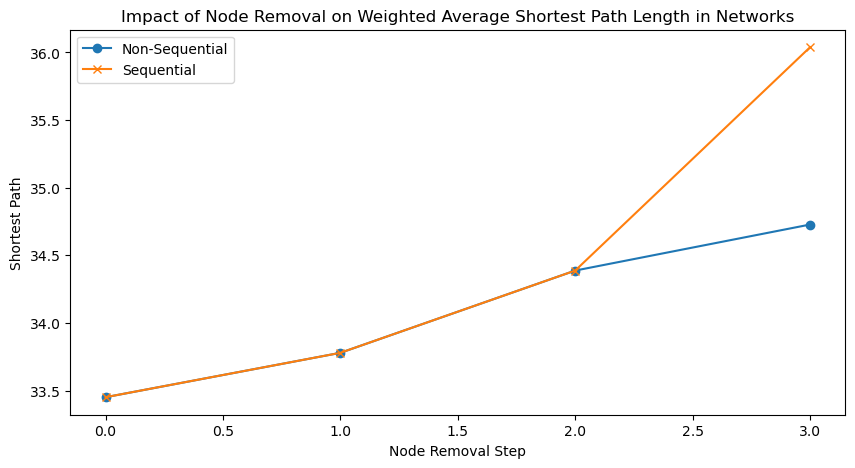

In [58]:
# Data for non-sequential removal: shortest path before and after removal
shortest_path_non_sequential_w = [non_sequential_betweenness_w['average_path_before'][0]] + non_sequential_betweenness_w['average_path_after'].tolist()

# Data for sequential removal: shortest path before and after removal
shortest_path_sequential_w = [results[0]['average_path_before']] + [result['average_path_after'] for result in results]

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the changes in  average shortest path for non-sequential removal
plt.plot(shortest_path_non_sequential_w, label='Non-Sequential', marker='o')

# Plot the changes in average shortest path for sequential removal
plt.plot(shortest_path_sequential_w, label='Sequential', marker='x')

# Add a legend
plt.legend()

# Add a title and axis labels
plt.title('Impact of Node Removal on Weighted Average Shortest Path Length in Networks')
plt.xlabel('Node Removal Step')
plt.ylabel('Shortest Path')

# Display the plot
plt.show()

**Weighted Global Efficiency**

In [59]:
def weighted_global_efficiency(G):
    n = len(G)
    sum_of_inverse_d = 0.0
    for u in G:
        path_length = nx.single_source_dijkstra_path_length(G, u, weight='scaled_flows_reciprocal')
        sum_of_inverse_d += sum(1 / d if d > 0 else 0 for v, d in path_length.items())
    return sum_of_inverse_d / (n * (n - 1))

def non_sequential_removal(G, nodes_to_remove):
    working_graph = G.copy()
    global_efficiencies_before = []
    global_efficiencies_after = [] 

    for node in nodes_to_remove:
       # Calculate and record global efficiency before removal
        global_efficiency_before = weighted_global_efficiency(working_graph)
        global_efficiencies_before.append(global_efficiency_before)
        
        working_graph.remove_node(node)
        
        # Calculate and record global efficiency after removal
        global_efficiency_after = weighted_global_efficiency(working_graph)
        global_efficiencies_after.append(global_efficiency_after)
        
    measures_df = pd.DataFrame({
        'removed_node': nodes_to_remove,
        'global_efficiency_before': global_efficiencies_before,
        'global_efficiency_after': global_efficiencies_after
    })

    return measures_df

betweenness_w = df_betweenness_w.sort_values(by='betweenness_w', ascending=False).head(3)
non_sequential_betweenness = non_sequential_removal(network, betweenness_w.index.tolist())
print(non_sequential_betweenness)

        removed_node  global_efficiency_before  global_efficiency_after
0         Green Park                  0.099750                 0.097717
1  Bank and Monument                  0.097717                 0.093551
2           Waterloo                  0.093551                 0.092142


In [60]:
def weighted_global_efficiency(G):
    n = len(G)
    sum_of_inverse_d = 0.0
    for u in G:
        path_length = nx.single_source_dijkstra_path_length(G, u, weight='scaled_flows_reciprocal')
        sum_of_inverse_d += sum(1 / d if d > 0 else 0 for v, d in path_length.items())
    return sum_of_inverse_d / (n * (n - 1))

def sequential_removal(G, centrality_func, weight=None):
    results = []
    current_G = G.copy()

    for i in range(3):  # Remove 3 nodes based on centrality for each type
        # Calculate weighted centrality if weight is specified
        if weight:
            centrality = centrality_func(current_G, weight=weight)
        else:
            centrality = centrality_func(current_G)
        
        # Find the node with the highest centrality and remove it
        max_centrality_node = max(centrality, key=centrality.get)

        # Calculate global efficiency before removal
        global_efficiency_before = weighted_global_efficiency(current_G)

        # Remove the node
        current_G.remove_node(max_centrality_node)

        # Calculate global efficiency after removal
        global_efficiency_after = weighted_global_efficiency(current_G)

        # Record the results
        results.append({
            'removed_node': max_centrality_node,
            'global_efficiency_before': global_efficiency_before,
            'global_efficiency_after': global_efficiency_after
        })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

def analyze_centrality_removal(G, centrality_func, weight=None):
    return sequential_removal(G, centrality_func, weight)

def perform_analysis(G):
    # Analyze weighted betweenness centrality
    betweenness_results = analyze_centrality_removal(G, nx.betweenness_centrality, weight='flows_reciprocal')

    # Return the result
    return betweenness_results

# Execute the analysis
results_df = perform_analysis(network)

# Print the results
print(results_df)

               removed_node  global_efficiency_before  global_efficiency_after
0                Green Park                  0.099750                 0.097717
1         Bank and Monument                  0.097717                 0.093551
2  King's Cross St. Pancras                  0.093551                 0.086635


In [61]:
def weighted_global_efficiency(G):
    n = len(G)
    sum_of_inverse_d = 0.0
    for u in G:
        path_length = nx.single_source_dijkstra_path_length(G, u, weight='scaled_flows_reciprocal')
        sum_of_inverse_d += sum(1 / d if d > 0 else 0 for v, d in path_length.items())
    return sum_of_inverse_d / (n * (n - 1))

def non_sequential_removal(G, nodes_to_remove):
    working_graph = G.copy()
    global_efficiencies_before = []
    global_efficiencies_after = []
    for node in nodes_to_remove:
        global_efficiency_before = weighted_global_efficiency(working_graph)
        global_efficiencies_before.append(global_efficiency_before)
        working_graph.remove_node(node)
        global_efficiency_after = weighted_global_efficiency(working_graph)
        global_efficiencies_after.append(global_efficiency_after)
    measures_df = pd.DataFrame({
        'removed_node': nodes_to_remove,
        'global_efficiency_before': global_efficiencies_before,
        'global_efficiency_after': global_efficiencies_after
    })
    return measures_df

# Assume df_betweenness_w is already defined and contains the correct data
betweenness_w = df_betweenness_w.sort_values(by='betweenness_w', ascending=False).head(3)
non_sequential_betweenness_w = non_sequential_removal(network, betweenness_w.index.tolist())

# Modify here to print results in the specified format
# Extract all values from 'global_efficiency_before' and the last item from 'global_efficiency_after'
efficiencies = list(non_sequential_betweenness_w['global_efficiency_before']) + [non_sequential_betweenness_w['global_efficiency_after'].iloc[-1]]

# Print each efficiency value
for eff in efficiencies:
    print(eff)

0.09974958604381796
0.09771726139643098
0.09355087557425236
0.0921415311206628


In [62]:
def weighted_global_efficiency(G):
    n = len(G)
    sum_of_inverse_d = 0.0
    for u in G:
        path_length = nx.single_source_dijkstra_path_length(G, u, weight='scaled_flows_reciprocal')
        sum_of_inverse_d += sum(1 / d if d > 0 else 0 for v, d in path_length.items())
    return sum_of_inverse_d / (n * (n - 1))

def sequential_removal(G, centrality_func, weight=None):
    results = []
    current_G = G.copy()

    for i in range(3):  # Remove 3 nodes based on centrality for each type
        # Calculate weighted centrality if weight is specified
        if weight:
            centrality = centrality_func(current_G, weight=weight)
        else:
            centrality = centrality_func(current_G)
        
        # Find the node with the highest centrality and remove it
        max_centrality_node = max(centrality, key=centrality.get)

        # Calculate global efficiency before removal
        global_efficiency_before = weighted_global_efficiency(current_G)

        # Remove the node
        current_G.remove_node(max_centrality_node)

        # Calculate global efficiency after removal
        global_efficiency_after = weighted_global_efficiency(current_G)

        # Record the results
        results.append({
            'iteration': i + 1,
            'removed_node': max_centrality_node,
            'global_efficiency_before': global_efficiency_before,
            'global_efficiency_after': global_efficiency_after
        })
    
    return results

def analyze_centrality_removal(G, centrality_func, weight=None):
    return sequential_removal(G, centrality_func, weight)

def perform_analysis(G):
    # Analyze weighted betweenness centrality
    betweenness_results = analyze_centrality_removal(G, nx.betweenness_centrality, weight='flows_reciprocal')

    # Return the result
    return betweenness_results

# Assuming 'network' is a NetworkX graph with weights assigned to edges
# Execute the analysis
results = perform_analysis(network)

# Print the results
for result in results:
    # Print the 'global_efficiency_before' for the first iteration
    if result['iteration'] == 1:
        print(result['global_efficiency_before'])
    # Print the 'global_efficiency_after' for every iteration
    print(result['global_efficiency_after'])

0.09974958604381796
0.09771726139643098
0.09355087557425236
0.08663474709982937


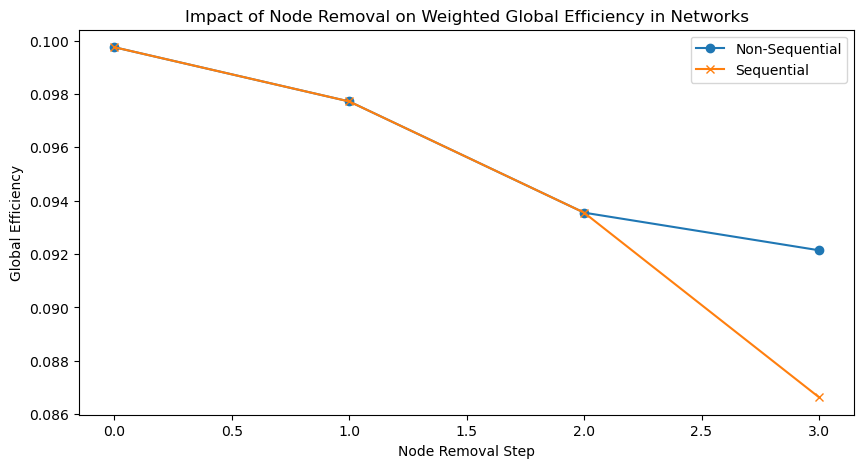

In [63]:
# Data for non-sequential removal: global efficiency before and after removal
efficiencies_non_sequential_w = [non_sequential_betweenness_w['global_efficiency_before'][0]] + non_sequential_betweenness_w['global_efficiency_after'].tolist()

# Data for sequential removal: global efficiency before and after removal
efficiencies_sequential_w = [results[0]['global_efficiency_before']] + [result['global_efficiency_after'] for result in results]

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the changes in global efficiency for non-sequential removal
plt.plot(efficiencies_non_sequential_w, label='Non-Sequential', marker='o')

# Plot the changes in global efficiency for sequential removal
plt.plot(efficiencies_sequential_w, label='Sequential', marker='x')

# Add a legend
plt.legend()

# Add a title and axis labels
plt.title('Impact of Node Removal on Weighted Global Efficiency in Networks')
plt.xlabel('Node Removal Step')
plt.ylabel('Global Efficiency')

# Display the plot
plt.show()

# Part2

## Read the data

In [64]:
London_OD = pd.read_csv("data/london_flows.csv")

In [65]:
London_OD

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [66]:
# Check the data
has_zeros_population = (London_OD['population'] == 0).any()
print(f"'population' contains zeros: {has_zeros_population}")
has_negatives_population = (London_OD['population'] < 0).any()
print(f"'population' contains negatives: {has_negatives_population}")

has_zeros_jobs = (London_OD['jobs'] == 0).any()
has_negatives_jobs = (London_OD['jobs'] < 0).any()
print(f"'jobs' contains zeros: {has_zeros_jobs}")
print(f"'jobs' contains negatives: {has_negatives_jobs}")

has_zeros_distance = (London_OD['distance'] == 0).any()
has_negatives_distance = (London_OD['distance'] < 0).any()
print(f"'distance' contains zeros: {has_zeros_distance}")
print(f"'distance' contains negatives: {has_negatives_distance}")

'population' contains zeros: True
'population' contains negatives: False
'jobs' contains zeros: True
'jobs' contains negatives: False
'distance' contains zeros: True
'distance' contains negatives: False


In [67]:
# Replace zero with NaN to avoid errors in subsequent logarithmic transformations
London_OD['population'] = London_OD['population'].apply(lambda x: np.nan if x == 0 else x)
London_OD['jobs'] = London_OD['jobs'].apply(lambda x: np.nan if x == 0 else x)
London_OD['distance'] = London_OD['distance'].apply(lambda x: np.nan if x == 0 else x)

# Delete rows containing NaN
London_OD.dropna(inplace=True)

In [68]:
London_OD

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554


In [69]:
has_same = (London_OD['station_origin'] == London_OD['station_destination']).any()
has_same

False

In [70]:
describe_data = London_OD[['population','jobs','distance']]

In [71]:
describe_data.describe()

,population,jobs,distance
count,61413.000000,61413.000000,61413.000000
mean,5531.287268,6136.050755,16322.593526
std,8505.483410,10915.202915,9400.312155
min,162.000000,42.000000,248.178706
25%,1554.000000,792.000000,8947.149423
50%,2839.000000,1921.000000,15237.159477
75%,5389.000000,6295.000000,22289.476167
max,67372.000000,78549.000000,60633.323742


## 1. Models and calibration

**Define R2 and RMSE**

In [72]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

### 1.1 Unconstrained Model

\begin{equation} \tag{1.1}
\lambda_{ij} = \exp (K + \alpha \ln O_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

**Parameter calibration**

In [73]:
# Take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    London_OD[f"log_{x}"] = np.log(London_OD[x])
    log_x_vars.append(f"log_{x}")

In [74]:
# Create the formula
formula = 'flows ~ population + log_jobs + distance'

# Run the unconstrained sim
uncosim = smf.glm(formula = formula, 
                  data=London_OD, 
                  family=sm.families.Poisson()).fit()

In [75]:
# Look at the summary of the model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3515e+06
Date:                Mon, 06 May 2024   Deviance:                   2.5308e+06
Time:                        00:18:56   Pearson chi2:                 4.61e+06
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3641      0.007   -360.659      0.0

$K$ (intercept) = -2.3641

$\alpha$ = 4.35e-05

$\gamma$ = 0.7363

$\beta$ = -9.135e-05

In [76]:
# Assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

London_OD["unconstrainedEst2"] = np.exp(K 
                                       + alpha*London_OD["population"] 
                                       + gamma*London_OD["log_jobs"] 
                                       - beta*London_OD["distance"])

predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
London_OD["fitted"] = predictions_summary_frame["mean"]

/tmp/ipykernel_317565/1405653633.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  K = uncosim.params[0]
/tmp/ipykernel_317565/1405653633.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = uncosim.params[1]
/tmp/ipykernel_317565/1405653633.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = uncosim.params[2]
/tmp/ipykernel_317565/1405653633.py:5: FutureWarning: Series.__getitem__ treating keys as positions is depr

In [77]:
uncosim.mu

array([184.67965978,   3.93428036,   8.19098574, ...,   4.57067321,
        12.09773186,  10.17709375])

In [78]:
# Round the numbers so that we don't get a half of a person
London_OD["unconstrainedEst2"] = round(London_OD["unconstrainedEst2"], 0)
# Convert to integers
London_OD["unconstrainedEst2"] = London_OD["unconstrainedEst2"].astype(int)
# Check that the sum of these estimates make sense
sum(London_OD["unconstrainedEst2"])

1542244

In [79]:
# Turn it into a little matrix and have a look at your handy work
London_ODmat1 = London_OD.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_ODmat1

/tmp/ipykernel_317565/3337123194.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmat1 = London_OD.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/3337123194.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmat1 = London_OD.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/3337123194.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable wil

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,1143
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,622
Acton Town,NaN,NaN,NaN,17.0,17.0,NaN,9.0,0.0,NaN,20.0,...,17.0,3.0,4.0,14.0,NaN,1.0,NaN,1.0,NaN,3624
Aldgate,NaN,NaN,7.0,NaN,70.0,NaN,NaN,0.0,NaN,58.0,...,12.0,NaN,10.0,8.0,NaN,3.0,NaN,3.0,NaN,6716
Aldgate East,NaN,NaN,6.0,69.0,NaN,NaN,2.0,0.0,NaN,58.0,...,12.0,2.0,9.0,8.0,NaN,4.0,NaN,3.0,NaN,6873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,20.0,23.0,NaN,NaN,NaN,NaN,17.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2416
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192
Woodside Park,NaN,NaN,3.0,16.0,16.0,NaN,1.0,NaN,NaN,22.0,...,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2364


In [80]:
R2_unconstrained = CalcRSquared(London_OD["flows"], London_OD["unconstrainedEst2"])
RMSE_unconstrained = CalcRMSE(London_OD["flows"], London_OD["unconstrainedEst2"])
print(f"R2 of the Unconstrained Model: {R2_unconstrained}")
print(f"RMSE of the unconstrained Model: {RMSE_unconstrained}")

R2 of the Unconstrained Model: 0.36054973111419025
RMSE of the unconstrained Model: 105.165


0R

In [81]:
## Unconstrained Model - Seconde method for calibration parameters

# Define the unconstrained model function
def unconstrained_model(distance, population, jobs, K, beta):
    return K * population * jobs * np.exp(-beta * distance)

# Transform the model to a form that can be handled by curve_fit by combining parameters into a single array
def curve_fit_unconstrained_model(x_data, K, beta):
    population, jobs, distance = x_data
    return unconstrained_model(distance, population, jobs, K, beta)

# Prepare data for curve fitting
x_data = np.array([London_OD['population'], London_OD['jobs'], London_OD['distance']])
y_data = London_OD['flows']

# Perform curve fitting
initial_guess = [1, 0.001]  # Initial guesses for K and beta
params_unconstrained, params_covariance_unconstrained = curve_fit(curve_fit_unconstrained_model, x_data, y_data, p0=initial_guess, maxfev=5000)

# Output the results with labels
K_estimated_unconstrained, beta_estimated_unconstrained = params_unconstrained
print(f"Estimated K: {K_estimated_unconstrained:.8f}")
print(f"Estimated beta: {beta_estimated_unconstrained:.8f}")

Estimated K: 0.00000135
Estimated beta: 0.00008465


In [82]:
# Use these parameters to predict the flows for the entire dataset
predicted_flows_unconstrained = unconstrained_model(London_OD['distance'], London_OD['population'], London_OD['jobs'], 
                                      K_estimated_unconstrained, beta_estimated_unconstrained)

# Add the predicted flows to the original dataframe for comparison and further analysis
London_OD['predicted_flows_unconstrained'] = predicted_flows_unconstrained

# Output the first few rows of the results to check
print(London_OD[['station_origin', 'station_destination', 'flows', 'predicted_flows_unconstrained']].head())

  station_origin station_destination  flows  predicted_flows_unconstrained
0     Abbey Road   Bank and Monument      0                      31.993428
1     Abbey Road             Beckton      1                       0.174351
2     Abbey Road           Blackwall      3                       0.391638
3     Abbey Road        Canary Wharf      1                      30.976653
4     Abbey Road        Canning Town     37                      10.356844


In [83]:
R2_unconstrained = CalcRSquared(London_OD["flows"], London_OD["predicted_flows_unconstrained"])
RMSE_unconstrained = CalcRMSE(London_OD["flows"], London_OD["predicted_flows_unconstrained"])
print(f"R2 of the Unconstrained Model: {R2_unconstrained}")
print(f"RMSE of the unconstrained Model: {RMSE_unconstrained}")

R2 of the Unconstrained Model: 0.40948212210643403
RMSE of the unconstrained Model: 101.278


But this model is difficult to interpret, so we don't use model in the study.

### 1.2 Single-Constrained Model

**Origin-Constrained Model**

In [84]:
# Create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
# Run a production constrained sim
prodSim = smf.glm(formula = formula, data=London_OD, family=sm.families.Poisson()).fit()
# Look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Mon, 06 May 2024   Deviance:                   1.8615e+06
Time:                        00:19:11   Pearson chi2:                 2.78e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [85]:
O_i = pd.DataFrame(London_OD.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
London_OD = London_OD.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(London_OD.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
London_OD = London_OD.merge(D_j, on = "station_destination", how = "left" )

/tmp/ipykernel_317565/3151425408.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  O_i = pd.DataFrame(London_OD.groupby(["station_origin"])["flows"].agg(np.sum))
/tmp/ipykernel_317565/3151425408.py:5: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  D_j = pd.DataFrame(London_OD.groupby(["station_destination"])["flows"].agg(np.sum))


In [86]:
London_OD.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,fitted,predicted_flows_unconstrained,O_i,D_j
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,185,184.679660,31.993428,599,78549
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,4,3.934280,0.174351,599,442
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,8,8.190986,0.391638,599,665
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,197,197.003222,30.976653,599,58772
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,96,95.530612,10.356844,599,15428


In [87]:
# Pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
    
# Join them back into the dataframes
London_OD = London_OD.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
London_OD.drop(columns = ["coef"], inplace = True)

# Check this has worked
London_OD.head(-10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,fitted,predicted_flows_unconstrained,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,185,184.679660,31.993428,599,78549,3.250242
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,4,3.934280,0.174351,599,442,3.250242
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,8,8.190986,0.391638,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,197,197.003222,30.976653,599,58772,3.250242
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,96,95.530612,10.356844,599,15428,3.250242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61398,Woolwich Arsenal,Prince Regent,17,7892.0,754.0,9126.792956,8.973605,6.625392,9.118970,8,7.567696,3.719312,7892,754,6.905590
61399,Woolwich Arsenal,Pudding Mill Lane,9,7892.0,431.0,11511.997133,8.973605,6.066108,9.351145,4,4.031638,1.737325,7892,431,6.905590
61400,Woolwich Arsenal,Royal Albert,29,7892.0,684.0,10015.213439,8.973605,6.527958,9.211861,6,6.494683,3.129582,7892,684,6.905590
61401,Woolwich Arsenal,Royal Victoria,20,7892.0,763.0,7995.962689,8.973605,6.637258,8.986692,8,8.464931,4.141795,7892,763,6.905590


In [88]:
alpha_i = prodSim.params[0:-2]
gamma1 = prodSim.params[-2]
beta1 = -prodSim.params[-1]

/tmp/ipykernel_317565/2773713664.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma1 = prodSim.params[-2]
/tmp/ipykernel_317565/2773713664.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1 = -prodSim.params[-1]


In [89]:
alpha_i

station_origin[Abbey Road]          3.250242
station_origin[Acton Central]       5.016902
station_origin[Acton Town]          4.562892
station_origin[Aldgate]             3.323767
station_origin[Aldgate East]        3.457664
                                      ...   
station_origin[Wood Street]         5.242024
station_origin[Woodford]            5.160643
station_origin[Woodgrange Park]     5.254667
station_origin[Woodside Park]       4.698635
station_origin[Woolwich Arsenal]    6.905590
Length: 398, dtype: float64

In [90]:
gamma1

0.7686156200124441

In [91]:
beta1

0.8781191183724283

In [92]:
London_OD["prodsimest"] = np.exp(London_OD["alpha_i"]+gamma1*London_OD["log_jobs"] 
                                 - beta1*London_OD["log_distance"])
# Round the estimates
London_OD["prodsimest"] = round(London_OD["prodsimest"],0)

London_OD.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,fitted,predicted_flows_unconstrained,O_i,D_j,alpha_i,prodsimest
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,185,184.679660,31.993428,599,78549,3.250242,55.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,4,3.934280,0.174351,599,442,3.250242,1.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,8,8.190986,0.391638,599,665,3.250242,3.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,197,197.003222,30.976653,599,58772,3.250242,66.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,96,95.530612,10.356844,599,15428,3.250242,49.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,10,9.743882,0.556047,599,1208,3.250242,3.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,10,9.727025,0.495568,599,845,3.250242,3.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,11,10.833989,0.689877,599,1748,3.250242,3.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,8,7.628825,0.396405,599,850,3.250242,2.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,8,7.568297,0.354308,599,611,3.250242,2.0


In [93]:
# Create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
London_ODmat2_1 = London_OD.pivot_table(values ="prodsimest", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_ODmat2_1

/tmp/ipykernel_317565/2134502942.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmat2_1 = London_OD.pivot_table(values ="prodsimest", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/2134502942.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmat2_1 = London_OD.pivot_table(values ="prodsimest", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/2134502942.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [94]:
R2_prodconstrain = CalcRSquared(London_OD["flows"], London_OD["prodsimest"])
RMSE_prodconstrain = CalcRMSE(London_OD["flows"], London_OD["prodsimest"])
print(f"R2 of the production (Origin) constrained Model: {R2_prodconstrain}")
print(f"RMSE of the production (Origin) constrained Model: {RMSE_prodconstrain}")

R2 of the production (Origin) constrained Model: 0.3882763950178627
RMSE of the production (Origin) constrained Model: 102.893


OR

In [95]:
# Run a production constrained model with a negative exponential cost function.
prodSim2 = "flows ~ station_origin + log_jobs + distance -1"
prodSim2 = smf.glm(formula=prodSim2, data = London_OD, family = sm.families.Poisson()).fit()
print(prodSim2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 06 May 2024   Deviance:                   1.6477e+06
Time:                        00:19:32   Pearson chi2:                 2.40e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [96]:
alpha_i2 = prodSim2.params[0:-2]
gamma2 = prodSim2.params[-2]
beta2 = -prodSim2.params[-1]

/tmp/ipykernel_317565/2848916826.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma2 = prodSim2.params[-2]
/tmp/ipykernel_317565/2848916826.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta2 = -prodSim2.params[-1]


In [97]:
alpha_i2

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 398, dtype: float64

In [98]:
gamma2

0.7552215895691091

In [99]:
beta2

0.00015316619346383872

In [100]:
# Pulling out the parameter values
coefs = pd.DataFrame(prodSim2.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i2", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
    
# Join them back into the dataframes
London_OD = London_OD.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
London_OD.drop(columns = ["coef"], inplace = True)

# Check this has worked
London_OD.head(-10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,fitted,predicted_flows_unconstrained,O_i,D_j,alpha_i,prodsimest,alpha_i2
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,185,184.679660,31.993428,599,78549,3.250242,55.0,-2.914322
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,4,3.934280,0.174351,599,442,3.250242,1.0,-2.914322
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,8,8.190986,0.391638,599,665,3.250242,3.0,-2.914322
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,197,197.003222,30.976653,599,58772,3.250242,66.0,-2.914322
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,96,95.530612,10.356844,599,15428,3.250242,49.0,-2.914322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61398,Woolwich Arsenal,Prince Regent,17,7892.0,754.0,9126.792956,8.973605,6.625392,9.118970,8,7.567696,3.719312,7892,754,6.905590,54.0,0.518041
61399,Woolwich Arsenal,Pudding Mill Lane,9,7892.0,431.0,11511.997133,8.973605,6.066108,9.351145,4,4.031638,1.737325,7892,431,6.905590,29.0,0.518041
61400,Woolwich Arsenal,Royal Albert,29,7892.0,684.0,10015.213439,8.973605,6.527958,9.211861,6,6.494683,3.129582,7892,684,6.905590,46.0,0.518041
61401,Woolwich Arsenal,Royal Victoria,20,7892.0,763.0,7995.962689,8.973605,6.637258,8.986692,8,8.464931,4.141795,7892,763,6.905590,61.0,0.518041


In [101]:
London_OD["prodsimest2"] = np.round(prodSim2.mu,0)
R2_prodconstrain2 = CalcRSquared(London_OD["flows"], London_OD["prodsimest2"])
RMSE_prodconstrain2 = CalcRMSE(London_OD["flows"], London_OD["prodsimest2"])
print(f"R2 of the production (Origin) constrained Model: {R2_prodconstrain2}")
print(f"RMSE of the production (Origin) constrained Model: {RMSE_prodconstrain2}")

R2 of the production (Origin) constrained Model: 0.4680648443542884
RMSE of the production (Origin) constrained Model: 96.263


**Attraction-Constrained Model(Destination-Constrained Model)**

In [102]:
# Create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_destination + log_population + log_distance - 1'
# Run a production constrained sim
attracSim = smf.glm(formula = formula, data=London_OD, family=sm.families.Poisson()).fit()
# Look at it's summary
print(attracSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1646e+06
Date:                Mon, 06 May 2024   Deviance:                   2.1570e+06
Time:                        00:19:57   Pearson chi2:                 3.65e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [103]:
# Pulling out the parameter values
coefs = pd.DataFrame(attracSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"B_j", "index":"coef"}, inplace = True)
to_repl = ["(station_destination)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
    
# Join them back into the dataframes
London_OD = London_OD.merge(coefs, left_on="station_destination", right_on="coef", how = "left")
London_OD.drop(columns = ["coef"], inplace = True)

# Check this has worked
London_OD.head(-10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,fitted,predicted_flows_unconstrained,O_i,D_j,alpha_i,prodsimest,alpha_i2,prodsimest2,B_j
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,185,184.679660,31.993428,599,78549,3.250242,55.0,-2.914322,78.0,4.925085
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,4,3.934280,0.174351,599,442,3.250242,1.0,-2.914322,1.0,2.016788
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,8,8.190986,0.391638,599,665,3.250242,3.0,-2.914322,4.0,1.743497
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,197,197.003222,30.976653,599,58772,3.250242,66.0,-2.914322,99.0,4.898678
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,96,95.530612,10.356844,599,15428,3.250242,49.0,-2.914322,56.0,3.639456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61398,Woolwich Arsenal,Prince Regent,17,7892.0,754.0,9126.792956,8.973605,6.625392,9.118970,8,7.567696,3.719312,7892,754,6.905590,54.0,0.518041,62.0,2.154858
61399,Woolwich Arsenal,Pudding Mill Lane,9,7892.0,431.0,11511.997133,8.973605,6.066108,9.351145,4,4.031638,1.737325,7892,431,6.905590,29.0,0.518041,28.0,1.409134
61400,Woolwich Arsenal,Royal Albert,29,7892.0,684.0,10015.213439,8.973605,6.527958,9.211861,6,6.494683,3.129582,7892,684,6.905590,46.0,0.518041,50.0,2.186885
61401,Woolwich Arsenal,Royal Victoria,20,7892.0,763.0,7995.962689,8.973605,6.637258,8.986692,8,8.464931,4.141795,7892,763,6.905590,61.0,0.518041,74.0,2.004376


In [104]:
B_j = attracSim.params[0:-2]
lambda2 = attracSim.params[-2]
beta2 = -attracSim.params[-1]

/tmp/ipykernel_317565/3525459290.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda2 = attracSim.params[-2]
/tmp/ipykernel_317565/3525459290.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta2 = -attracSim.params[-1]


In [105]:
B_j

station_destination[Abbey Road]          1.108254
station_destination[Acton Central]       2.420602
station_destination[Acton Town]          1.990907
station_destination[Aldgate]             2.829568
station_destination[Aldgate East]        2.810273
                                           ...   
station_destination[Wood Street]         1.987630
station_destination[Woodford]            1.117206
station_destination[Woodgrange Park]     2.159501
station_destination[Woodside Park]       1.242249
station_destination[Woolwich Arsenal]    4.458413
Length: 398, dtype: float64

In [106]:
lambda2

0.7451183523204032

In [107]:
beta2

0.635148070375309

In [108]:
London_OD["attracsimest"] = np.exp(London_OD["B_j"]+lambda2*London_OD["log_population"] 
                                 - beta2*London_OD["log_distance"])
# Round the estimates
London_OD["attracsimest"] = round(London_OD["attracsimest"],0)
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
London_OD.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,fitted,predicted_flows_unconstrained,O_i,D_j,alpha_i,prodsimest,alpha_i2,prodsimest2,B_j,attracsimest
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,185,184.679660,31.993428,599,78549,3.250242,55.0,-2.914322,78.0,4.925085,53.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,4,3.934280,0.174351,599,442,3.250242,1.0,-2.914322,1.0,2.016788,3.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,8,8.190986,0.391638,599,665,3.250242,3.0,-2.914322,4.0,1.743497,4.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,197,197.003222,30.976653,599,58772,3.250242,66.0,-2.914322,99.0,4.898678,70.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,96,95.530612,10.356844,599,15428,3.250242,49.0,-2.914322,56.0,3.639456,33.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,10,9.743882,0.556047,599,1208,3.250242,3.0,-2.914322,4.0,2.493650,5.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,10,9.727025,0.495568,599,845,3.250242,3.0,-2.914322,5.0,2.160960,5.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,11,10.833989,0.689877,599,1748,3.250242,3.0,-2.914322,4.0,3.054832,8.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,8,7.628825,0.396405,599,850,3.250242,2.0,-2.914322,3.0,2.498031,5.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,8,7.568297,0.354308,599,611,3.250242,2.0,-2.914322,4.0,1.812741,4.0


In [109]:
# Create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
London_ODmat2_2 = London_OD.pivot_table(values ="attracsimest", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_ODmat2_2

/tmp/ipykernel_317565/3858566595.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmat2_2 = London_OD.pivot_table(values ="attracsimest", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/3858566595.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmat2_2 = London_OD.pivot_table(values ="attracsimest", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/3858566595.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be u

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,591.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,586.0
Acton Town,NaN,NaN,NaN,16.0,16.0,NaN,8.0,1.0,NaN,17.0,...,26.0,3.0,5.0,9.0,NaN,2.0,NaN,2.0,NaN,3546.0
Aldgate,NaN,NaN,6.0,NaN,62.0,NaN,NaN,1.0,NaN,36.0,...,19.0,NaN,6.0,5.0,NaN,2.0,NaN,3.0,NaN,5702.0
Aldgate East,NaN,NaN,6.0,68.0,NaN,NaN,3.0,1.0,NaN,37.0,...,20.0,2.0,7.0,5.0,NaN,3.0,NaN,3.0,NaN,6029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,20.0,21.0,NaN,NaN,NaN,NaN,19.0,...,19.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3431.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0
Woodside Park,NaN,NaN,5.0,14.0,13.0,NaN,2.0,NaN,NaN,16.0,...,15.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2404.0


In [110]:
R2_attracconstrain = CalcRSquared(London_OD["flows"], London_OD["attracsimest"])
RMSE_attracconstrain = CalcRMSE(London_OD["flows"], London_OD["attracsimest"])
print(f"R2 of the attraction (destination) constrained Model: {R2_attracconstrain}")
print(f"RMSE of the attraction (destination) constrained Model: {RMSE_attracconstrain}")

R2 of the attraction (destination) constrained Model: 0.3499323840939915
RMSE of the attraction (destination) constrained Model: 106.013


OR

In [111]:
# Run a attraction constrained model with a negative exponential cost function.
attracSim2 = "flows ~ station_destination + population + distance -1"
attracSim2 = smf.glm(formula=attracSim2, data = London_OD, family = sm.families.Poisson()).fit()
print(attracSim2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2474e+06
Date:                Mon, 06 May 2024   Deviance:                   2.3226e+06
Time:                        00:20:16   Pearson chi2:                 3.76e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [112]:
# Pulling out the parameter values
coefs = pd.DataFrame(attracSim2.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"B_j2", "index":"coef"}, inplace = True)
to_repl = ["(station_destination)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
    
# Join them back into the dataframes
London_OD = London_OD.merge(coefs, left_on="station_destination", right_on="coef", how = "left")
London_OD.drop(columns = ["coef"], inplace = True)

# Check this has worked
London_OD.head(-10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,...,predicted_flows_unconstrained,O_i,D_j,alpha_i,prodsimest,alpha_i2,prodsimest2,B_j,attracsimest,B_j2
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,185,...,31.993428,599,78549,3.250242,55.0,-2.914322,78.0,4.925085,53.0,6.148408
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,4,...,0.174351,599,442,3.250242,1.0,-2.914322,1.0,2.016788,3.0,2.820610
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,8,...,0.391638,599,665,3.250242,3.0,-2.914322,4.0,1.743497,4.0,2.794400
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,197,...,30.976653,599,58772,3.250242,66.0,-2.914322,99.0,4.898678,70.0,6.077239
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,96,...,10.356844,599,15428,3.250242,49.0,-2.914322,56.0,3.639456,33.0,4.818912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61398,Woolwich Arsenal,Prince Regent,17,7892.0,754.0,9126.792956,8.973605,6.625392,9.118970,8,...,3.719312,7892,754,6.905590,54.0,0.518041,62.0,2.154858,21.0,3.023374
61399,Woolwich Arsenal,Pudding Mill Lane,9,7892.0,431.0,11511.997133,8.973605,6.066108,9.351145,4,...,1.737325,7892,431,6.905590,29.0,0.518041,28.0,1.409134,9.0,2.481085
61400,Woolwich Arsenal,Royal Albert,29,7892.0,684.0,10015.213439,8.973605,6.527958,9.211861,6,...,3.129582,7892,684,6.905590,46.0,0.518041,50.0,2.186885,21.0,3.037218
61401,Woolwich Arsenal,Royal Victoria,20,7892.0,763.0,7995.962689,8.973605,6.637258,8.986692,8,...,4.141795,7892,763,6.905590,61.0,0.518041,74.0,2.004376,20.0,2.949347


In [113]:
London_OD["attracsimest2"] = np.round(attracSim2.mu,0)
R2_attracconstrained2 = CalcRSquared(London_OD["flows"], London_OD["attracsimest2"])
RMSE_attracconstrained2 = CalcRMSE(London_OD["flows"], London_OD["attracsimest2"])
print(f"R2 of the Doubly Constrained Model: {R2_attracconstrained2}")
print(f"RMSE of the Doubly Constrained Model: {RMSE_attracconstrained2}")

R2 of the Doubly Constrained Model: 0.40508569851202825
RMSE of the Doubly Constrained Model: 101.41


### 1.3 Doubly Constrained Model

\begin{equation} \tag{1.3}
T_{ij} = A_i B_j O_i D_j d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation} 
O_i = \sum_j T_{ij}
\end{equation}

\begin{equation} 
D_j = \sum_i T_{ij} 
\end{equation}

and

\begin{equation} 
A_i = \frac{1}{\sum_j B_j D_j d_{ij}^{-\beta}}
\end{equation}

\begin{equation} 
B_j = \frac{1}{\sum_i A_i O_i d_{ij}^{-\beta}}
\end{equation}

In [114]:
# Create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + station_destination + log_population + log_jobs + log_distance - 1'
# Run a production constrained sim
doublySim = smf.glm(formula = formula, data=London_OD, family=sm.families.Poisson()).fit()
# Look at it's summary
print(doublySim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Mon, 06 May 2024   Deviance:                   1.7693e+06
Time:                        00:21:43   Pearson chi2:                 2.47e+06
No. Iterations:                    22   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [115]:
# Get the estimates
London_OD["doubsimfitted"] = np.round(doublySim.mu)
# Get the matrix
London_ODmat3 = London_OD.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
London_ODmat3

/tmp/ipykernel_317565/1501501714.py:4: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmat3 = London_OD.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/1501501714.py:4: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmat3 = London_OD.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/1501501714.py:4: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be use

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [116]:
R2_doublyconstrained1 = CalcRSquared(London_OD["flows"], London_OD["doubsimfitted"])
RMSE_doublyconstrained1 = CalcRMSE(London_OD["flows"], London_OD["doubsimfitted"])
print(f"R2 of the Doubly Constrained Model: {R2_doublyconstrained1}")
print(f"RMSE of the Doubly Constrained Model: {RMSE_doublyconstrained1}")

R2 of the Doubly Constrained Model: 0.40768532292960646
RMSE of the Doubly Constrained Model: 101.335


*OR*

In [117]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form2 = "flows ~ station_origin + station_destination + distance -1"
doubsim2 = smf.glm(formula=doubsim_form2, data = London_OD, family = sm.families.Poisson()).fit()
print(doubsim2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Mon, 06 May 2024   Deviance:                   1.5299e+06
Time:                        00:22:44   Pearson chi2:                 2.02e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [118]:
London_OD["doubsimfitted2"] = np.round(doubsim2.mu,0)

In [119]:
R2_doublyconstrained2 = CalcRSquared(London_OD["flows"], London_OD["doubsimfitted2"])
RMSE_doublyconstrained2 = CalcRMSE(London_OD["flows"], London_OD["doubsimfitted2"])
print(f"R2 of the Doubly Constrained Model: {R2_doublyconstrained2}")
print(f"RMSE of the Doubly Constrained Model: {RMSE_doublyconstrained2}")

R2 of the Doubly Constrained Model: 0.497842741463233
RMSE of the Doubly Constrained Model: 93.401


In [120]:
lambda3 = doublySim.params[-3]
gamma3 = doublySim.params[-2]
beta3 = -doublySim.params[-1]
beta4 = -doubsim2.params[-1]

/tmp/ipykernel_317565/3847194732.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda3 = doublySim.params[-3]
/tmp/ipykernel_317565/3847194732.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma3 = doublySim.params[-2]
/tmp/ipykernel_317565/3847194732.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta3 = -doublySim.params[-1]
/tmp/ipykernel_317565/3847194732.py:4: FutureWarning: Series.__getitem__ treating keys as 

In [121]:
lambda3

0.524427297438284

In [122]:
gamma3

0.8486391616681176

In [123]:
# For the first dual constraint model
beta3

0.9096317604932753

In [124]:
# For the second dual constraint model
beta4

0.00015436969215365764

In [125]:
# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd


Using the function above to calculate $A_{i}$ and $B_{j}$ for the previous Poisson model by plugging in the estimate of beta that we generated.

In [126]:
## Power function model

# Get the balancing factors.
London_OD = balance_doubly_constrained(London_OD,'station_origin','station_destination','O_i','D_j','distance',-beta4,'power')

# Predict the model again using the new Ai and Dj fields.
London_OD['SIM_est_pow'] = np.round(London_OD['O_i'] * London_OD['Ai_new'] * London_OD['D_j'] * London_OD['Bj_new'] * 
                                   np.exp(np.log(London_OD['distance'])*-beta4))

# Check out the matrix
pd.pivot_table(London_OD,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21


/tmp/ipykernel_317565/3403813657.py:11: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  pd.pivot_table(London_OD,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
/tmp/ipykernel_317565/3403813657.py:11: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  pd.pivot_table(London_OD,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)
/tmp/ipykernel_317565/3403813657.py:11: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callab

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,600.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1223.0
Acton Town,0.0,0.0,0.0,24.0,24.0,0.0,3.0,1.0,0.0,24.0,...,20.0,2.0,6.0,6.0,0.0,2.0,0.0,3.0,0.0,3752.0
Aldgate,0.0,0.0,5.0,0.0,18.0,0.0,0.0,1.0,0.0,18.0,...,15.0,0.0,5.0,4.0,0.0,2.0,0.0,2.0,0.0,2883.0
Aldgate East,0.0,0.0,6.0,20.0,0.0,0.0,2.0,1.0,0.0,20.0,...,16.0,2.0,5.0,5.0,0.0,2.0,0.0,2.0,0.0,3170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,9.0,32.0,31.0,0.0,0.0,0.0,0.0,31.0,...,26.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4862.0
Woodgrange Park,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0
Woodside Park,0.0,0.0,6.0,21.0,20.0,0.0,2.0,0.0,0.0,20.0,...,17.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3091.0


In [127]:
R2_doublyconstrained3 = CalcRSquared(London_OD["flows"], London_OD["SIM_est_pow"])
RMSE_doublyconstrained3 = CalcRMSE(London_OD["flows"], London_OD["SIM_est_pow"])
print(f"R2 of the Doubly Constrained Model: {R2_doublyconstrained3}")
print(f"RMSE of the Doubly Constrained Model: {RMSE_doublyconstrained3}")

R2 of the Doubly Constrained Model: 0.4272684170447385
RMSE of the Doubly Constrained Model: 100.329


In [128]:
# ## Exponential function model

# # Use the beta we got from the negative exponential model
# beta = -doublySim.params[-1]
# # Get the balancing factors. NB Setting of new field names for Ai and Bj.
# London_OD = balance_doubly_constrained(London_OD,'station_origin','station_destination','O_i','D_j','distance',-beta,'exponential','Ai_exp','Bj_exp')

# # Predict the model again using the new Ai and Dj fields.
# London_OD['SIM_est_exp'] = np.round(London_OD['O_i'] * London_OD['Ai_exp'] * London_OD['D_j'] * London_OD['Bj_exp'] * 
#                                    np.exp(London_OD['Dist']*-beta))
# # Check out the matrix
# pd.pivot_table(London_OD,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

In [129]:
## But it doesn't converge during iteration

## 2. Scenarios

### 2.1 Scenario A

In [130]:
def scenario_A(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["jobs"] * 0.5
    else:
        val = row["jobs"]
    return val
        
London_OD["scenario_A"] = London_OD.apply(scenario_A, axis =1)
London_OD.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,...,B_j,attracsimest,B_j2,attracsimest2,doubsimfitted,doubsimfitted2,Ai_new,Bj_new,SIM_est_pow,scenario_A
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,185,...,4.925085,53.0,6.148408,215.0,55.0,77.0,0.000003,0.847456,126.0,78549.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,4,...,2.016788,3.0,2.820610,7.0,2.0,3.0,0.000003,3.539153,3.0,442.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,8,...,1.743497,4.0,2.794400,12.0,3.0,4.0,0.000003,3.667622,5.0,665.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,197,...,4.898678,70.0,6.077239,271.0,77.0,112.0,0.000003,0.834940,93.0,29386.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,96,...,3.639456,33.0,4.818912,102.0,45.0,48.0,0.000003,0.837637,24.0,15428.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,10,...,2.493650,5.0,3.457368,17.0,3.0,5.0,0.000003,3.561025,8.0,1208.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,10,...,2.160960,5.0,3.051661,15.0,4.0,5.0,0.000003,3.491451,6.0,845.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,11,...,3.054832,8.0,3.946090,23.0,5.0,6.0,0.000003,3.861985,13.0,1748.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,8,...,2.498031,5.0,3.321165,15.0,4.0,5.0,0.000003,3.592957,6.0,850.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,8,...,1.812741,4.0,2.732884,11.0,3.0,4.0,0.000003,3.566335,4.0,611.0


In [131]:
# Calculate some new wj^alpha and d_ij^beta values
jobs_gamma1 = London_OD["jobs"]**gamma1
distance_beta1 = London_OD["distance"]**(-beta1)
# Calcualte the first stage of the Ai and Bj values
London_OD["Ai_A_1"] = jobs_gamma1 * distance_beta1
# Do the sum over all js bit
A_i_A_1 = pd.DataFrame(London_OD.groupby(["station_origin"])["Ai_A_1"].agg(np.sum))
# Divide into 1
A_i_A_1["Ai_A_1"] = 1/A_i_A_1["Ai_A_1"]
A_i_A_1.rename(columns={"Ai_A_1":"A_i_A_1"}, inplace=True)
# Write the A_i and B_j values back into the dataframe
London_OD = London_OD.merge(A_i_A_1, left_on="station_origin", right_index=True, how="left")

/tmp/ipykernel_317565/98698464.py:7: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i_A_1 = pd.DataFrame(London_OD.groupby(["station_origin"])["Ai_A_1"].agg(np.sum))


In [132]:
# To check everything works, recreate the original estimates
London_OD["predict_A_1"] = London_OD["A_i_A_1"]*London_OD["O_i"]*jobs_gamma1*distance_beta1
# Round
London_OD["predict_A_1"] = round(London_OD["predict_A_1"])

In [133]:
# Check the pivot
London_ODmatA_1 = London_OD.pivot_table(values ="predict_A_1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
canary_wharf_London_ODmatA_1 = London_ODmatA_1["Canary Wharf"]
canary_wharf_London_ODmatA_1

/tmp/ipykernel_317565/383539814.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmatA_1 = London_OD.pivot_table(values ="predict_A_1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/383539814.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmatA_1 = London_OD.pivot_table(values ="predict_A_1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/383539814.py:2: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used d

station_origin
Abbey Road             66.0
Acton Central           NaN
Acton Town             73.0
Aldgate                57.0
Aldgate East           81.0
                     ...   
Woodford              185.0
Woodgrange Park         NaN
Woodside Park          77.0
Woolwich Arsenal     1437.0
All                 50536.0
Name: Canary Wharf, Length: 399, dtype: float64

In [134]:
# Calculate some new wj^alpha and d_ij^beta values
scenario_A_gamma1 = London_OD["scenario_A"]**gamma1
# Calcualte the first stage of the Ai and Bj values
London_OD["Ai_A_2"] = scenario_A_gamma1 * distance_beta1
# Do the sum over all js bit
A_i_A_2 = pd.DataFrame(London_OD.groupby(["station_origin"])["Ai_A_2"].agg(np.sum))
# Divide into 1
A_i_A_2["Ai_A_2"] = 1/A_i_A_2["Ai_A_2"]
A_i_A_2.rename(columns={"Ai_A_2":"A_i_A_2"}, inplace=True)
# Write the A_i and B_j values back into the dataframe
London_OD = London_OD.merge(A_i_A_2, left_on="station_origin", right_index=True, how="left")

/tmp/ipykernel_317565/382678127.py:6: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i_A_2 = pd.DataFrame(London_OD.groupby(["station_origin"])["Ai_A_2"].agg(np.sum))


In [135]:
## To check everything works, recreate the original estimates
London_OD["predict_A_2"] = London_OD["A_i_A_2"]*London_OD["O_i"]*scenario_A_gamma1*distance_beta1
# Round
London_OD["predict_A_2"] = round(London_OD["predict_A_2"])
# Check
London_OD[["prodsimest2", "predict_A_1", "predict_A_2"]]

,prodsimest2,predict_A_1,predict_A_2
0,78.0,55.0,58.0
1,1.0,1.0,1.0
2,4.0,3.0,3.0
3,99.0,66.0,41.0
4,56.0,49.0,51.0
...,...,...,...
61408,99.0,121.0,131.0
61409,295.0,259.0,280.0
61410,36.0,32.0,35.0
61411,125.0,98.0,106.0


Use another preduction-constrain model

In [136]:
London_ODmatA_2 = London_OD.pivot_table(values ="predict_A_2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
canary_wharf_London_ODmatA_2 = London_ODmatA_2["Canary Wharf"]
canary_wharf_London_ODmatA_2

/tmp/ipykernel_317565/426002131.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmatA_2 = London_OD.pivot_table(values ="predict_A_2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/426002131.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_ODmatA_2 = London_OD.pivot_table(values ="predict_A_2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/426002131.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used d

station_origin
Abbey Road             41.0
Acton Central           NaN
Acton Town             43.0
Aldgate                34.0
Aldgate East           48.0
                     ...   
Woodford              110.0
Woodgrange Park         NaN
Woodside Park          46.0
Woolwich Arsenal      912.0
All                 31306.0
Name: Canary Wharf, Length: 399, dtype: float64

In [137]:
# Take the variables and produce logarithms of them
x_variable_A = ["scenario_A"]
log_x_var = []
for x in x_variable_A:
    London_OD[f"log_{x}"] = np.log(London_OD[x])
    log_x_var.append(f"log_{x}")

In [138]:
# Update the model for the new jobs
prodSim2_updated = "flows ~ station_origin + log_scenario_A + distance -1"
prodSim2_updated = smf.glm(formula=prodSim2_updated, data = London_OD, family = sm.families.Poisson()).fit()
London_OD["predict_A"] = np.round(prodSim2_updated.mu, 0)

# Calculate the total of the new predicted flows
original_total_flows = sum(London_OD["flows"])
new_total_flows = sum(London_OD["predict_A"])
scale_factor = original_total_flows / new_total_flows

# Adjust the new flow predictions using the scale factor to ensure total number of commuters remains constant
new_flows = London_OD["predict_A"]
adjusted_flows = new_flows * scale_factor

# Update the dataframe to include the adjusted flow predictions if needed
London_OD['predict_A_adjusted'] = adjusted_flows

In [139]:
London_OD["predict_A_adjusted"] = np.round(London_OD["predict_A_adjusted"])

In [140]:
London_flows_origin = London_OD.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
canary_wharf_origin = London_flows_origin["Canary Wharf"]
canary_wharf_origin

/tmp/ipykernel_317565/3765867278.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_flows_origin = London_OD.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/3765867278.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_flows_origin = London_OD.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/3765867278.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used di

station_origin
Abbey Road              1.0
Acton Central           NaN
Acton Town             57.0
Aldgate                 1.0
Aldgate East            3.0
                     ...   
Woodford              192.0
Woodgrange Park         NaN
Woodside Park          42.0
Woolwich Arsenal       82.0
All                 58772.0
Name: Canary Wharf, Length: 399, dtype: float64

In [141]:
London_flows_after = London_OD.pivot_table(values ="predict_A_adjusted", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
canary_wharf_after = London_flows_after["Canary Wharf"]
canary_wharf_after

/tmp/ipykernel_317565/3891668634.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_flows_after = London_OD.pivot_table(values ="predict_A_adjusted", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/3891668634.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_flows_after = London_OD.pivot_table(values ="predict_A_adjusted", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/3891668634.py:1: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided 

station_origin
Abbey Road             63.0
Acton Central           NaN
Acton Town             21.0
Aldgate                46.0
Aldgate East           63.0
                     ...   
Woodford              152.0
Woodgrange Park         NaN
Woodside Park          25.0
Woolwich Arsenal      956.0
All                 29628.0
Name: Canary Wharf, Length: 399, dtype: float64

### 2.1 Scenario B

In [142]:
# First, check the original traffic matrix
London_flows_origin

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [143]:
# Assign the new value to beta to change the 'cost'
betaB_1 = 0.0005
London_OD["scenario_B1"] = np.exp(London_OD["alpha_i2"]+gamma2*London_OD["log_jobs"] 
                                 - betaB_1*London_OD["distance"])
# Round the estimates
London_OD["scenario_B1"] = round(London_OD["scenario_B1"],0)

# Create a pivot tabel
London_flows_B1 = London_OD.pivot_table(values ="scenario_B1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_flows_B1

/tmp/ipykernel_317565/2868892886.py:9: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_flows_B1 = London_OD.pivot_table(values ="scenario_B1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/2868892886.py:9: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_flows_B1 = London_OD.pivot_table(values ="scenario_B1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/2868892886.py:9: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be use

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,227.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,198.0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,2.0,0.0,NaN,0.0,...,0.0,0.0,0.0,2.0,NaN,0.0,NaN,0.0,NaN,288.0
Aldgate,NaN,NaN,0.0,NaN,23.0,NaN,NaN,0.0,NaN,8.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,870.0
Aldgate East,NaN,NaN,0.0,24.0,NaN,NaN,0.0,0.0,NaN,8.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,151.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0
Woodside Park,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0


In [144]:
# Assign the new value to beta to change the 'cost'
betaB_2 = -0.0010
London_OD["scenario_B2"] = np.exp(London_OD["alpha_i2"]+gamma2*London_OD["log_jobs"] 
                                 + betaB_2*London_OD["distance"])
# Round the estimates
London_OD["scenario_B2"] = round(London_OD["scenario_B2"],0)

# Create a pivot tabel
London_flows_B2 = London_OD.pivot_table(values ="scenario_B2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_flows_B2

/tmp/ipykernel_317565/2272398732.py:9: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_flows_B2 = London_OD.pivot_table(values ="scenario_B2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/2272398732.py:9: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  London_flows_B2 = London_OD.pivot_table(values ="scenario_B2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_317565/2272398732.py:9: FutureWarning: The provided callable <function sum at 0x7fcf8002ad40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be use

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,103.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,50.0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,61.0
Aldgate,NaN,NaN,0.0,NaN,11.0,NaN,NaN,0.0,NaN,1.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,332.0
Aldgate East,NaN,NaN,0.0,12.0,NaN,NaN,0.0,0.0,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
Woodside Park,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0


/tmp/ipykernel_317565/576620371.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = London_OD.groupby('distance_category').agg({'flows':'mean', 'scenario_B1':'mean', 'scenario_B2':'mean'})


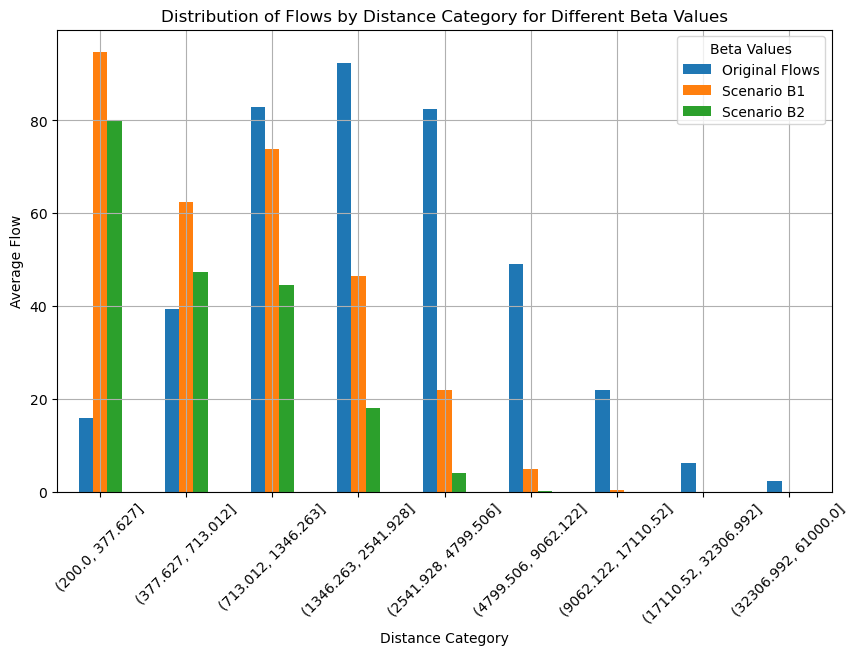

In [145]:
# Set spacing
bins = np.logspace(np.log10(200), np.log10(61000), num=10)
London_OD['distance_category'] = pd.cut(London_OD['distance'], bins)

# Then aggregate the data by distance classification and calculate the average flow rate for each interval
grouped = London_OD.groupby('distance_category').agg({'flows':'mean', 'scenario_B1':'mean', 'scenario_B2':'mean'})

# Draw a bar chart to compare the flow distribution under different values
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Flows by Distance Category for Different Beta Values')
plt.xlabel('Distance Category')
plt.ylabel('Average Flow')
plt.legend(['Original Flows', 'Scenario B1', 'Scenario B2'], title='Beta Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2.3 Discussions (No code)